In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('../input/homicide-reports/database.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [5]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

          Record ID           Year       Incident     Victim Age  \
count  638454.00000  638454.000000  638454.000000  638454.000000   
mean   319227.50000    1995.801102      22.967924      35.033512   
std    184305.93872       9.927693      92.149821      41.628306   
min         1.00000    1980.000000       0.000000       0.000000   
25%    159614.25000    1987.000000       1.000000      22.000000   
50%    319227.50000    1995.000000       2.000000      30.000000   
75%    478840.75000    2004.000000      10.000000      42.000000   
max    638454.00000    2014.000000     999.000000     998.000000   

        Victim Count  Perpetrator Count  
count  638454.000000      638454.000000  
mean        0.123334           0.185224  
std         0.537733           0.585496  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000           0.000000  
max        10.000000          10.000000  


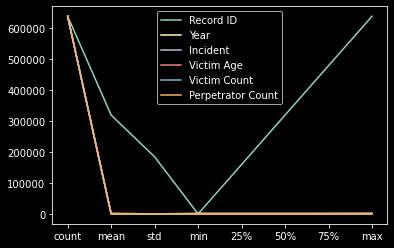

In [9]:
print(df.describe())
df.describe().plot()

In [10]:
import seaborn as sns

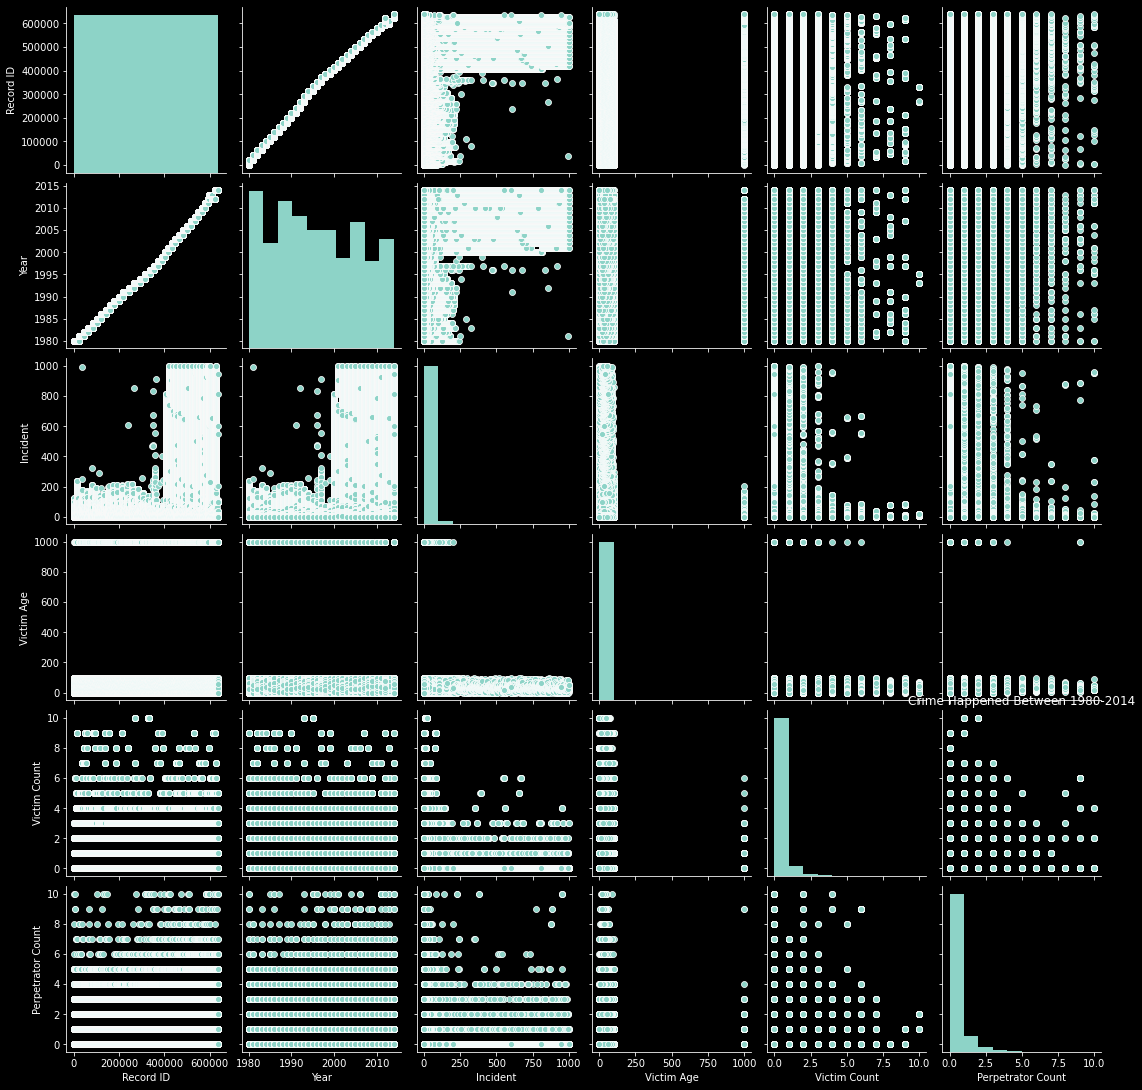

In [11]:
sns.pairplot(df)
plt.title('Crime Happened Between 1980-2014')
plt.show()

In [12]:
crime_describe = df.describe()
type(crime_describe)

pandas.core.frame.DataFrame

In [13]:
crime_describe = crime_describe.drop(columns = ['Record ID'])

In [14]:
crime_describe

,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,0.123334,0.185224
std,9.927693,92.149821,41.628306,0.537733,0.585496
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,2004.000000,10.000000,42.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,10.000000,10.000000


In [15]:
df['Incident'].sum()

14663963

### So we have 14.663963 Million Crime Happpened In Just 34 Years In US..

In [16]:
states = df['State'].unique()

In [17]:
len(states)

#so in all states

51

In [18]:
cities = df['City'].unique()
len(cities)

1782

In [19]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [21]:
more_focused = df[['Victim Sex', 'Victim Age', 'Perpetrator Sex','Perpetrator Age', 'Relationship', 
                  'Weapon', 'Victim Count', 'Perpetrator Count', 'Crime Type', 'City', 'State','Year', 
                  'Month', 'Incident']]

In [22]:
more_focused.head()

,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Relationship,Weapon,Victim Count,Perpetrator Count,Crime Type,City,State,Year,Month,Incident
0,Male,14,Male,15,Acquaintance,Blunt Object,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,January,1
1,Male,43,Male,42,Acquaintance,Strangulation,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,March,1
2,Female,30,Unknown,0,Unknown,Unknown,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,March,2
3,Male,43,Male,42,Acquaintance,Strangulation,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,April,1
4,Female,30,Unknown,0,Unknown,Unknown,0,1,Murder or Manslaughter,Anchorage,Alaska,1980,April,2


In [23]:
more_focused['Crime Type'].unique()

# so we have just murdered..

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [25]:
more_focused['Victim Count'].sum()

78743

In [26]:
more_focused['Perpetrator Count'].sum()

118257

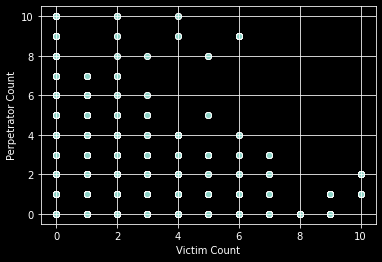

In [24]:
sns.scatterplot(more_focused['Victim Count'], more_focused['Perpetrator Count'])
plt.grid()

###### Strange! We see When Perpetrator Decreases Victim Count Increases

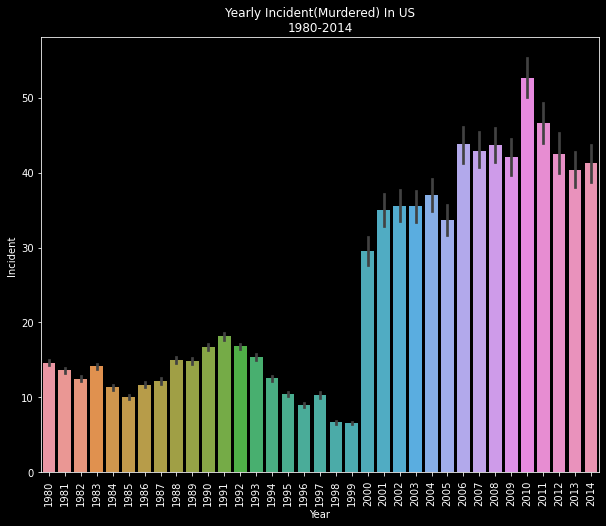

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(more_focused['Year'],more_focused['Incident'])
plt.xticks(rotation= 'vertical')
plt.title('Yearly Incident(Murdered) In US\n1980-2014')
plt.show()

### We Can See After 2008 Financial Crisis The Rate Had Rised Heavily.. But After Few Years the Count Has become Quite steady..

### From 1991 to 1999,crime number decreases.. We have to find the relevant possibilities that has been done on those years by the authority.. It may be applying strict rules or financial stability or good govern or may be decreasing in particular cities that has high number of cases.

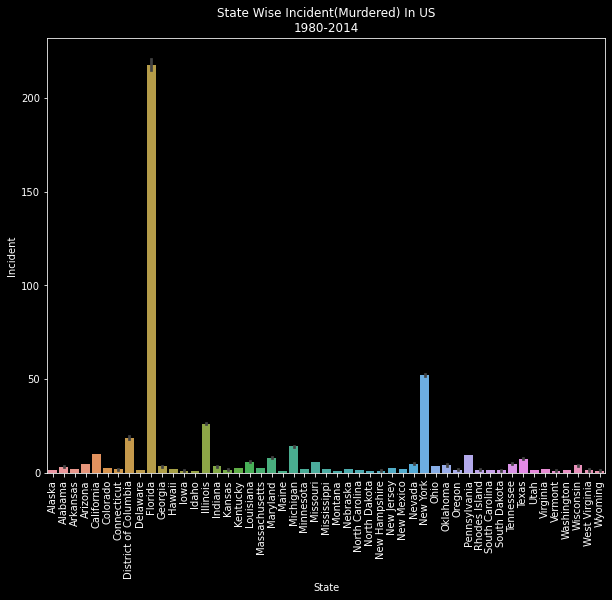

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(more_focused['State'], more_focused['Incident'])
plt.xticks(rotation= 'vertical')
plt.title('State Wise Incident(Murdered) In US\n1980-2014')
plt.show()

### we can find Florida and New York to be exceptionally high in crime rate.. This may be caused by over population that other cities, having less strict and applied rules or curroption.. Or in those area number of Gang may cause extermely high number..or the overall population mentality is not stable like other cities.. This may be cause by over drug availablity or family distance..

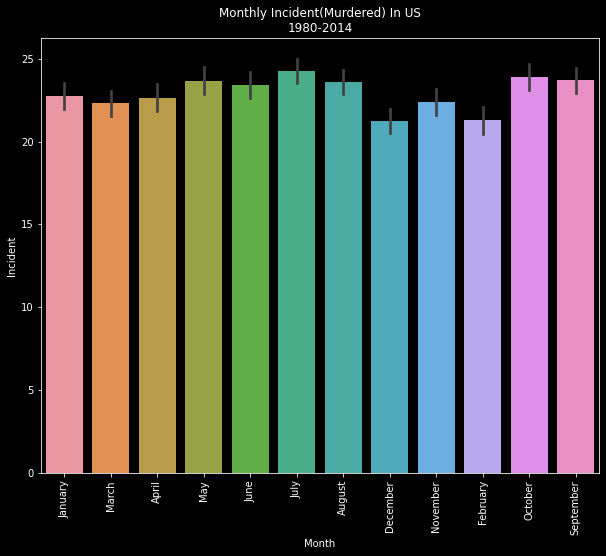

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(more_focused['Month'], more_focused['Incident'])
plt.xticks(rotation= 'vertical')
plt.title('Monthly Incident(Murdered) In US\n1980-2014')
plt.show()

#### This plot dosnt help.. 

In [31]:
cities =  more_focused.groupby('City')['Incident'].sum()

In [39]:
cities_describe = cities.describe()
cities_describe

count    1.782000e+03
mean     8.228935e+03
std      8.480235e+04
min      1.000000e+00
25%      1.500000e+01
50%      4.400000e+01
75%      1.947500e+02
max      2.560664e+06
Name: Incident, dtype: float64

#### Our 75% of cities Crime Count Lies 194.7500
- in New York It is highest
- So we Will Visualize our data in 75% or Our Q3
- There are few cities which crime count is above our Q3 value of 195

In [33]:
below_100 =  cities.loc[cities < 100].values
below_1000 =  cities.loc[cities < 1000].values
below_10000 =  cities.loc[cities < 10000].values
below_100000 =  cities.loc[cities < 100000].values
below_1000000 =  cities.loc[cities < 1000000].values

above_1M_incident_city = cities.loc[cities < 1000000]
above_1lakh_to_1M_incident_city = cities.loc[(cities > 100000) & (cities <1000000)]
above_10th_to_1lakh_incident_city = cities.loc[(cities > 10000) & (cities <100000)]
above_1th_to_10th_incident_city = cities.loc[(cities > 1000) & (cities <10000)]
above_100_to_1th_incident_city = cities.loc[(cities > 100) & (cities <1000)]
above_10_to_100_incident_city = cities.loc[(cities > 10) & (cities <100)]
above_0_to_10_incident_city = cities.loc[(cities > 0) & (cities <10)]

In [34]:
print('Amount Of Cities Having Number Of Incident\n')
print(f'> 1M :              {len(above_1M_incident_city)}')
print(f'1lakh> <1M :        {len(above_1lakh_to_1M_incident_city)}')
print(f'10th> <1lakh :      {len(above_10th_to_1lakh_incident_city)}')
print(f'1th> <10th :        {len(above_1th_to_10th_incident_city)}')
print(f'100> <1th :         {len(above_100_to_1th_incident_city)}')
print(f'10> <100 :          {len(above_10_to_100_incident_city)}')
print(f'0> <10 :            {len(above_0_to_10_incident_city)}')

Amount Of Cities Having Number Of Incident

> 1M :              1780
1lakh> <1M :        26
10th> <1lakh :      58
1th> <10th :        108
100> <1th :         429
10> <100 :          817
0> <10 :            319


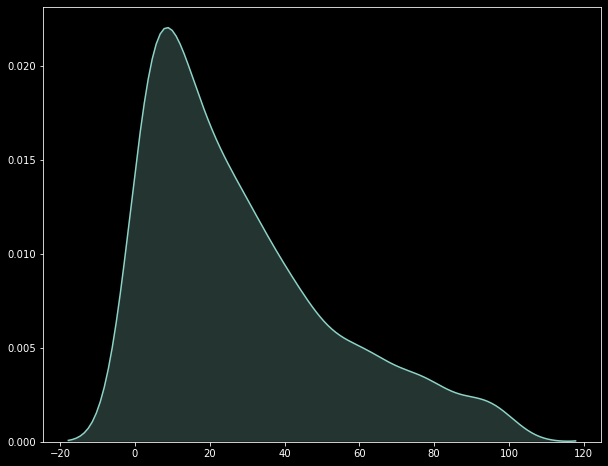

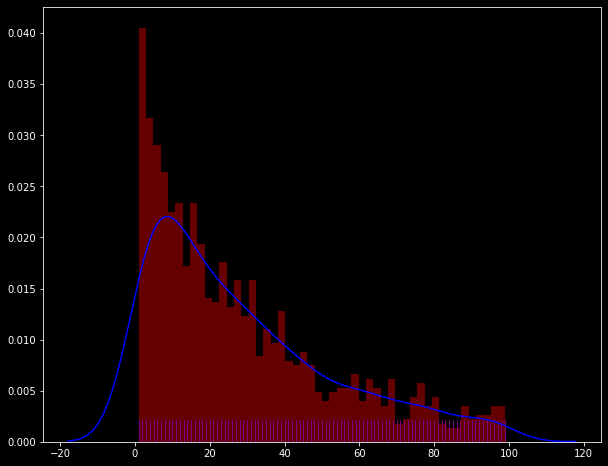

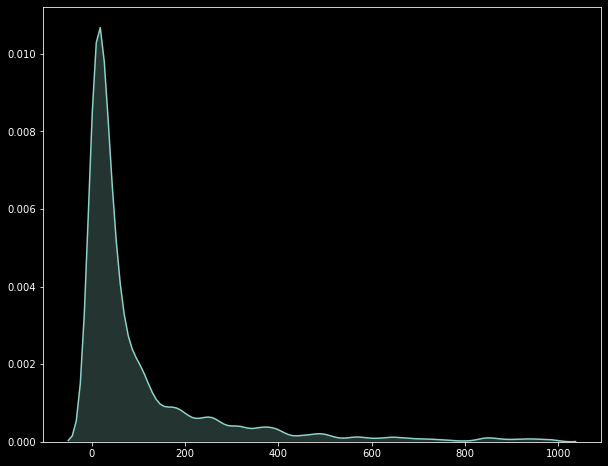

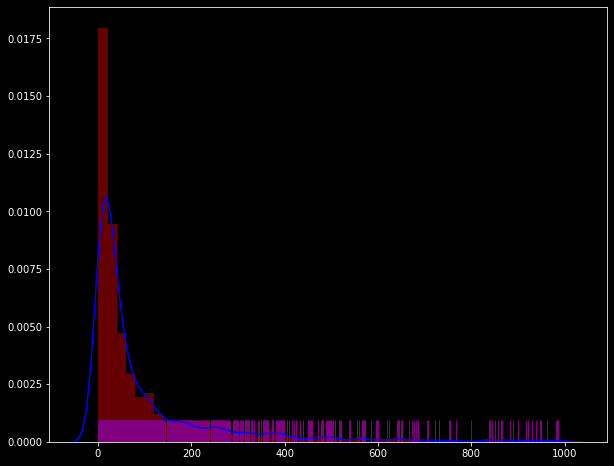

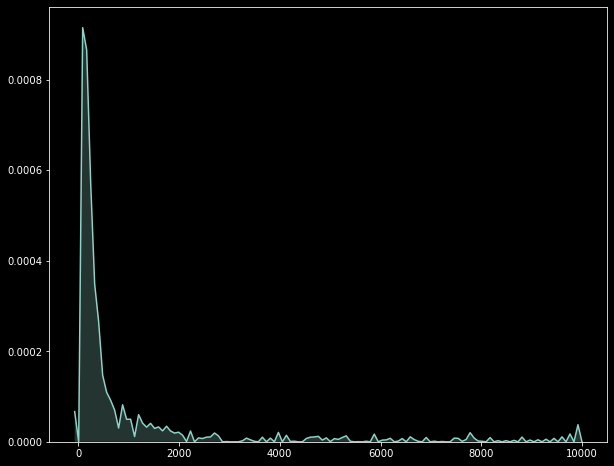

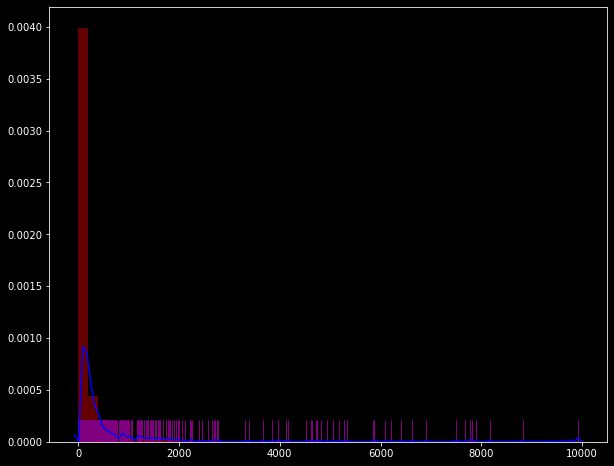

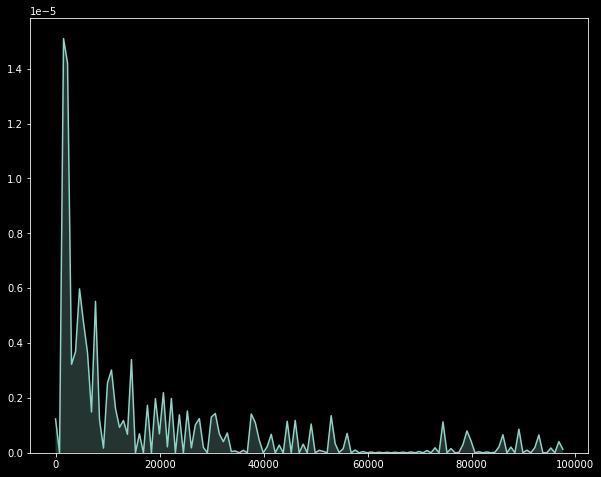

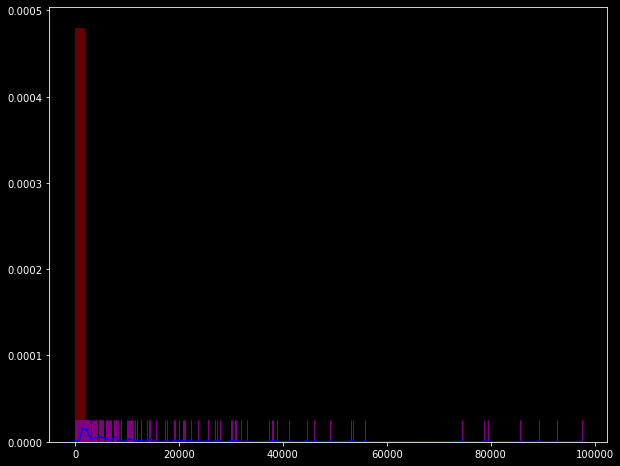

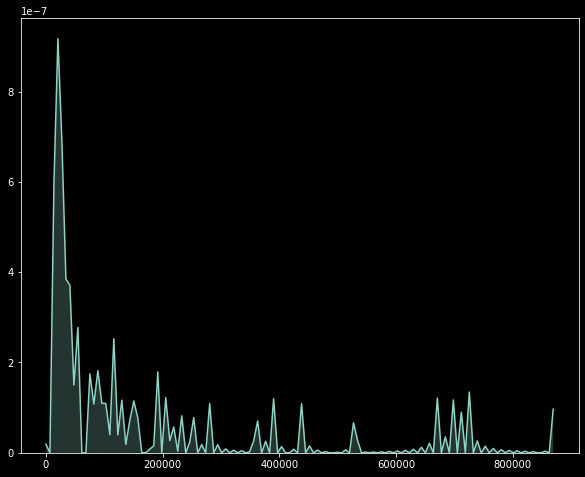

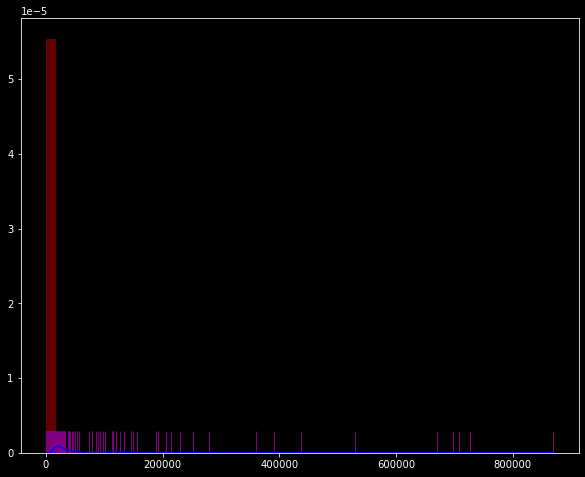

In [36]:
range_list = [below_100, below_1000, below_10000, below_100000, below_1000000]
j = 0

while j < 5:
    for i in range_list:
        
        plt.figure(figsize=(10,8))
        sns.kdeplot(i, shade = True)
        plt.show()
        
        
        plt.figure(figsize=(10,8))
        sns.distplot(i,bins= 50,rug=True, rug_kws={'color':'purple'}, hist_kws= {'color': 'red'}, kde_kws= {'color': 'blue'})
        plt.show()
        
        j +=1

In [37]:
std = []
mean_cities = cities.mean()
std_cities = cities.std()

for i in cities:
    standardizise =( i - mean_cities )/ std_cities  
    std.append(standardizise)

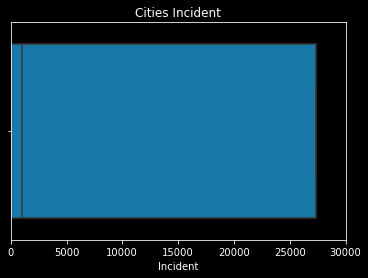

In [40]:
sns.boxplot(cities_describe, palette='winter')
plt.xlim([0,30000])
plt.title('Cities Incident')
plt.show()

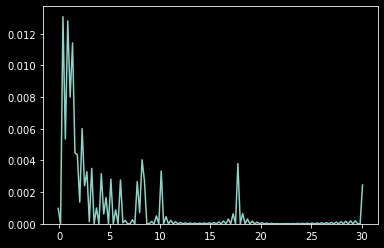

In [41]:
sns.kdeplot(std)

- Standardized Kde plot

In [42]:
cities_describe = cities.describe()
cities_describe

count    1.782000e+03
mean     8.228935e+03
std      8.480235e+04
min      1.000000e+00
25%      1.500000e+01
50%      4.400000e+01
75%      1.947500e+02
max      2.560664e+06
Name: Incident, dtype: float64

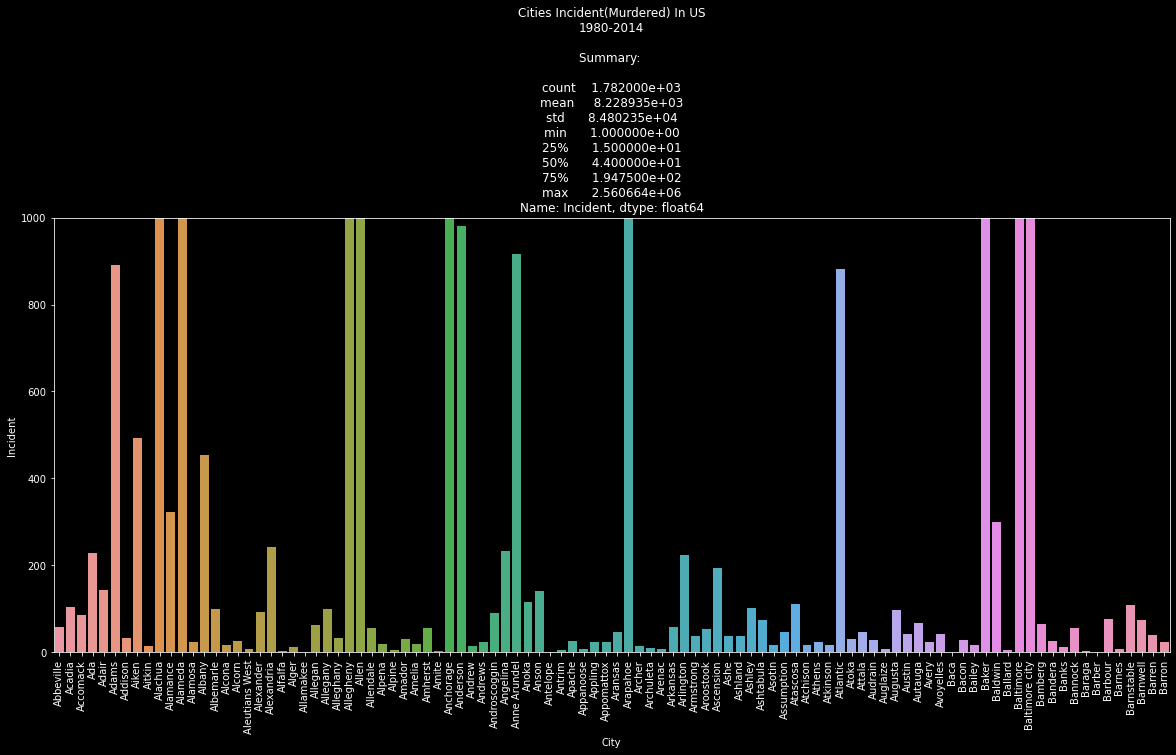

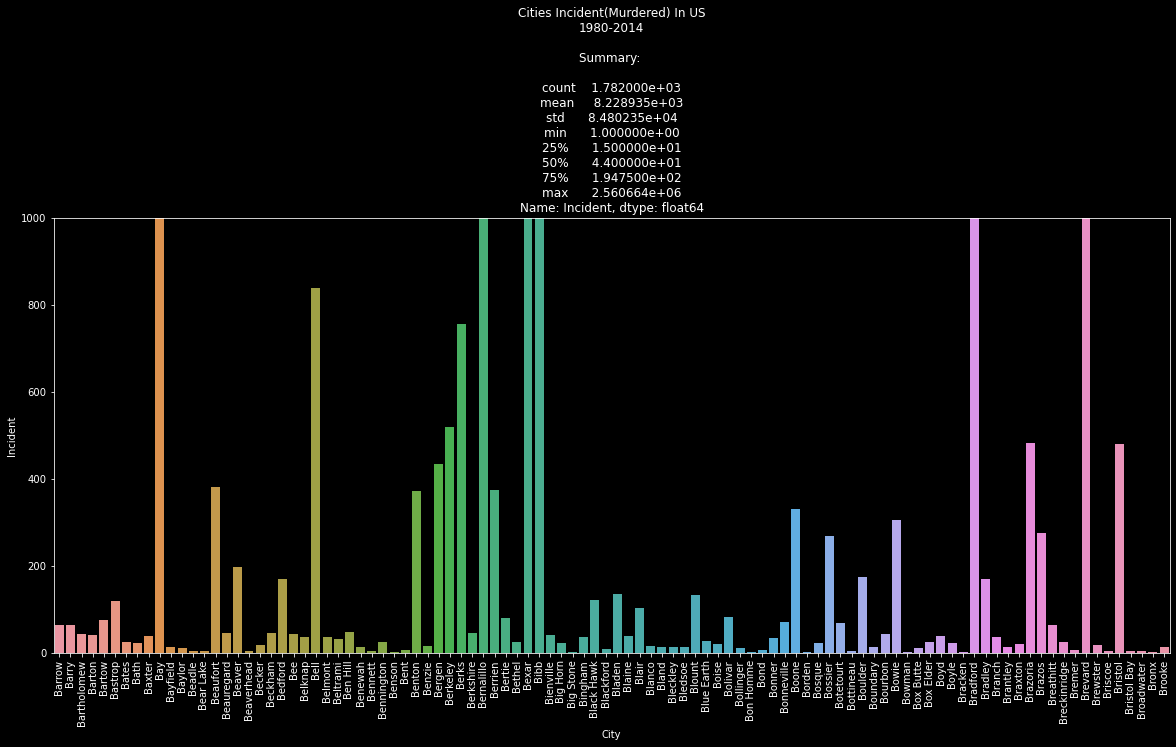

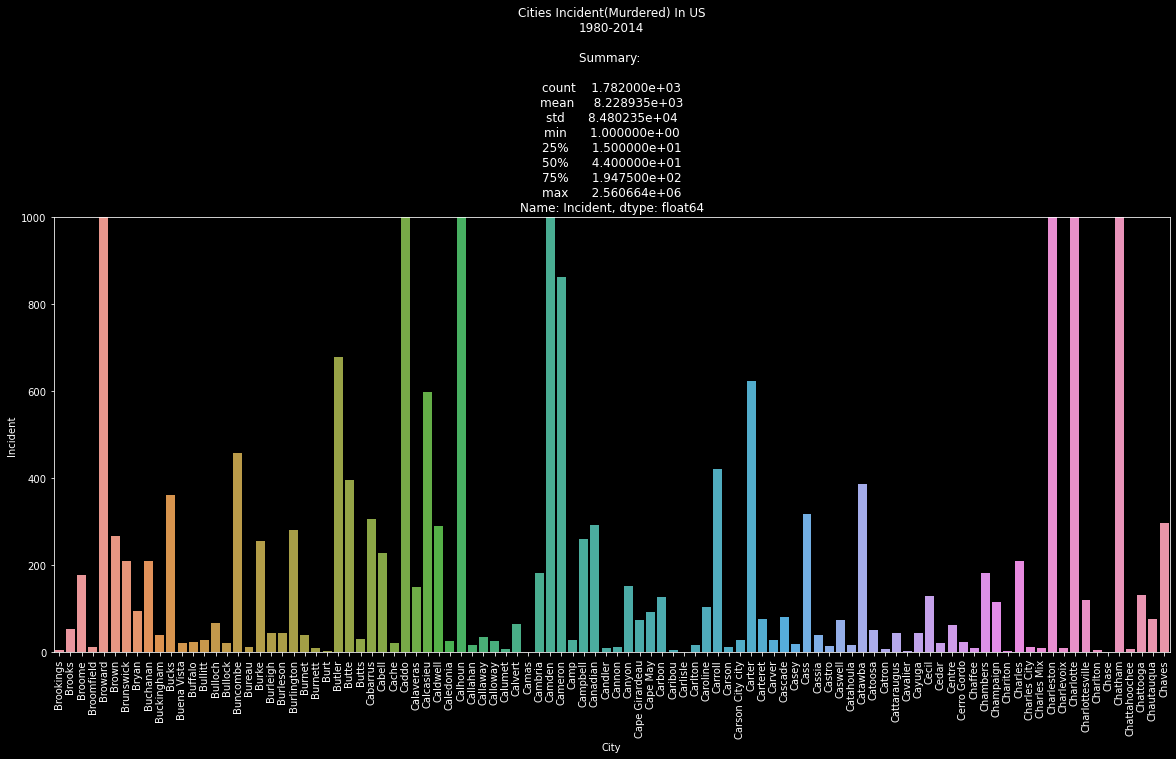

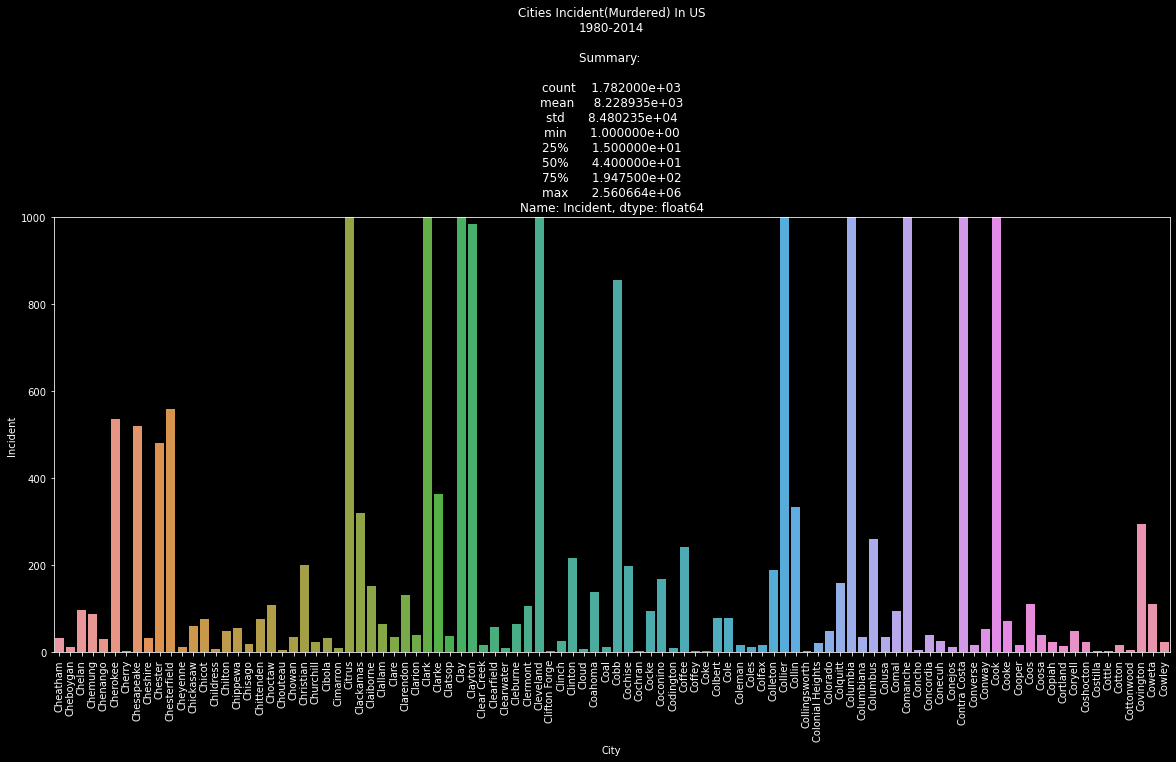

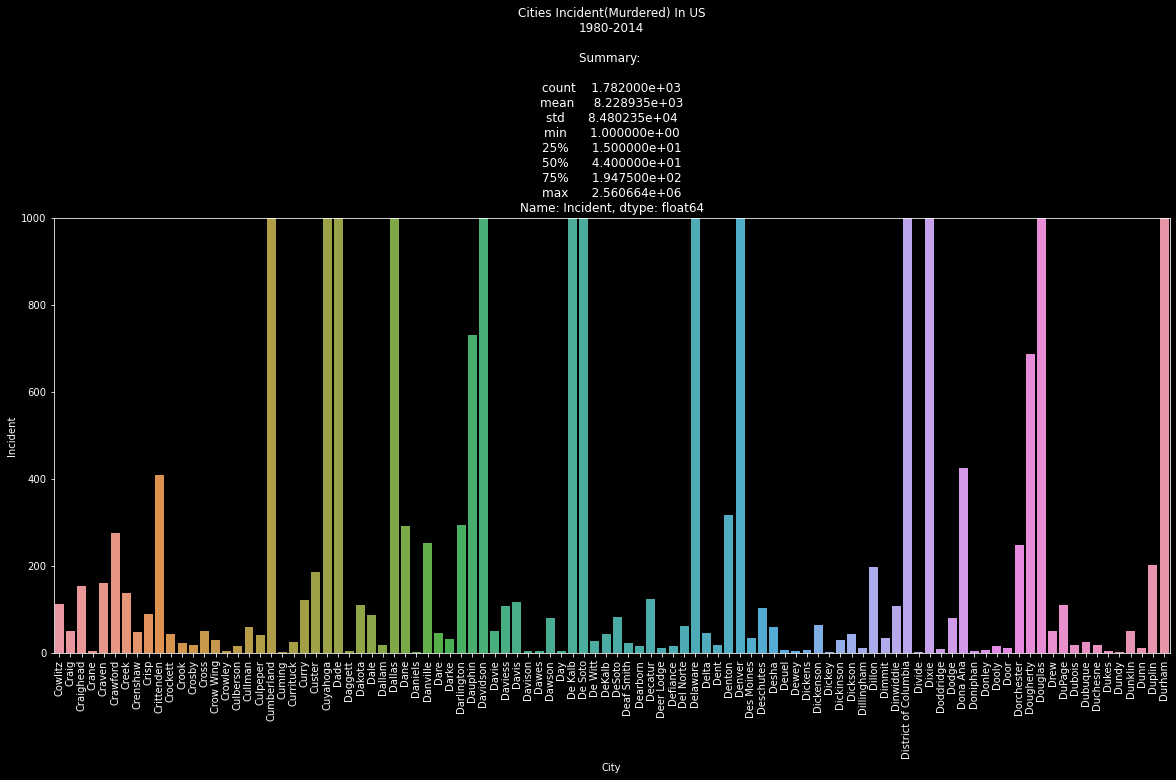

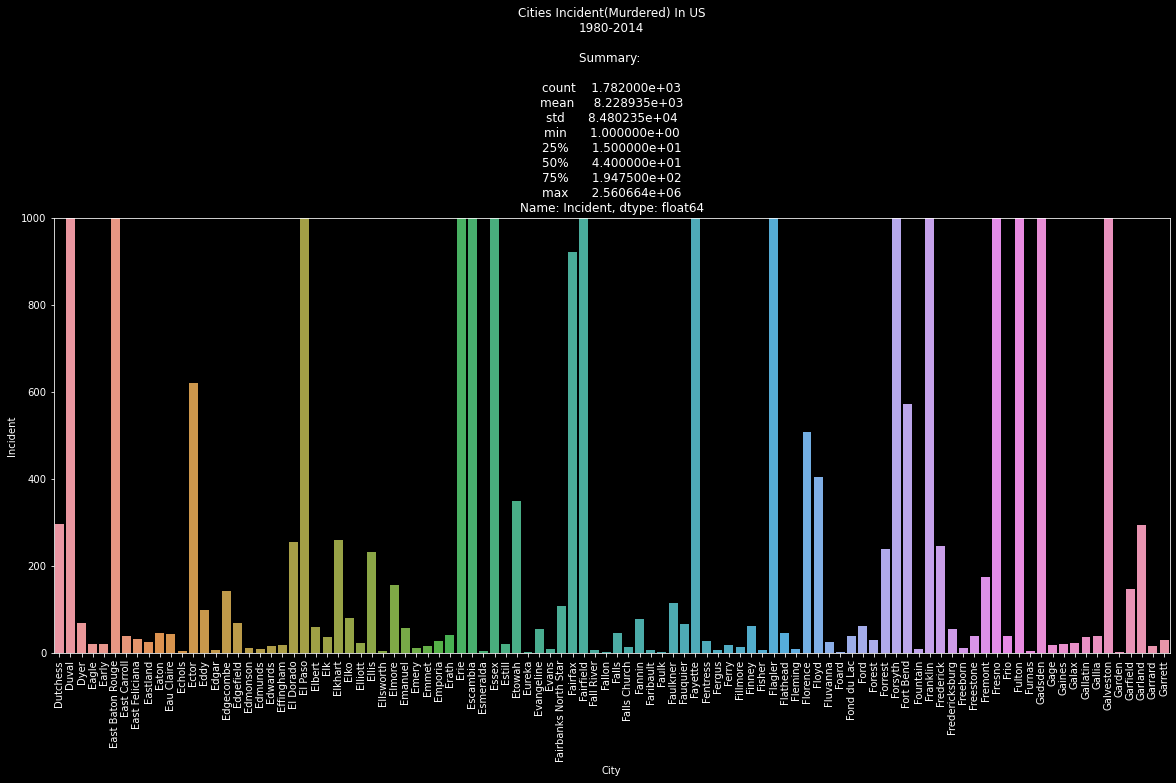

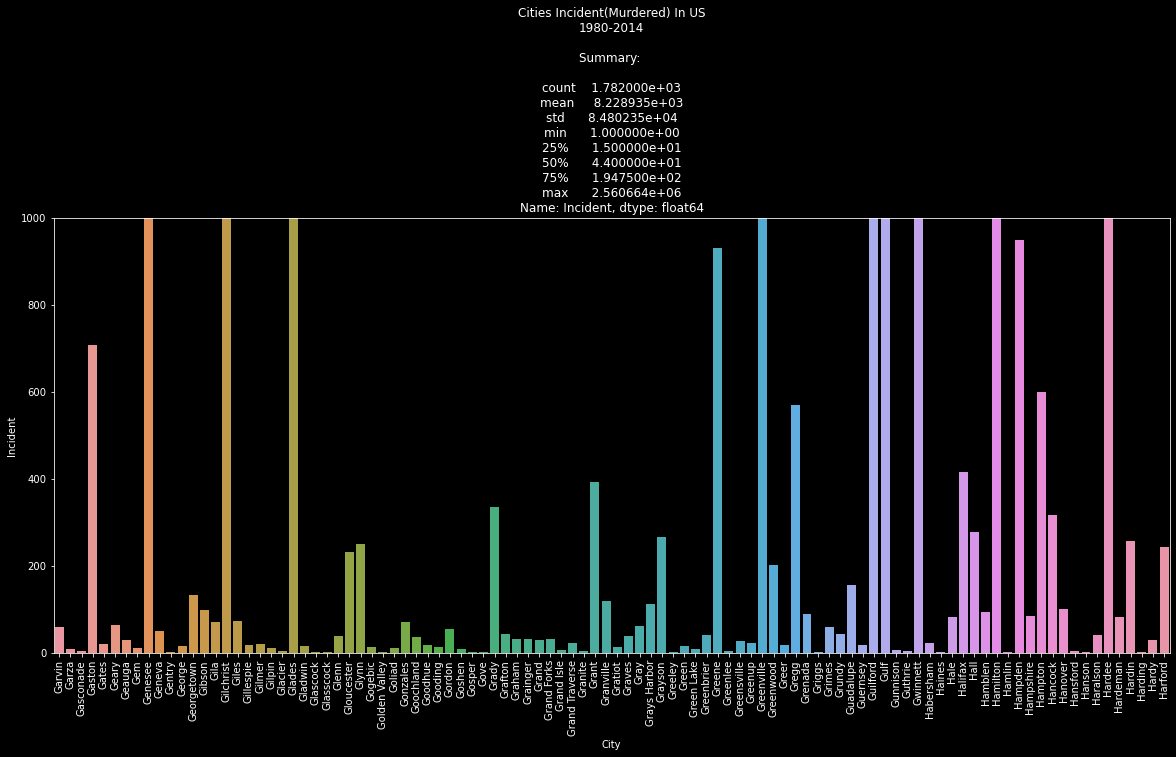

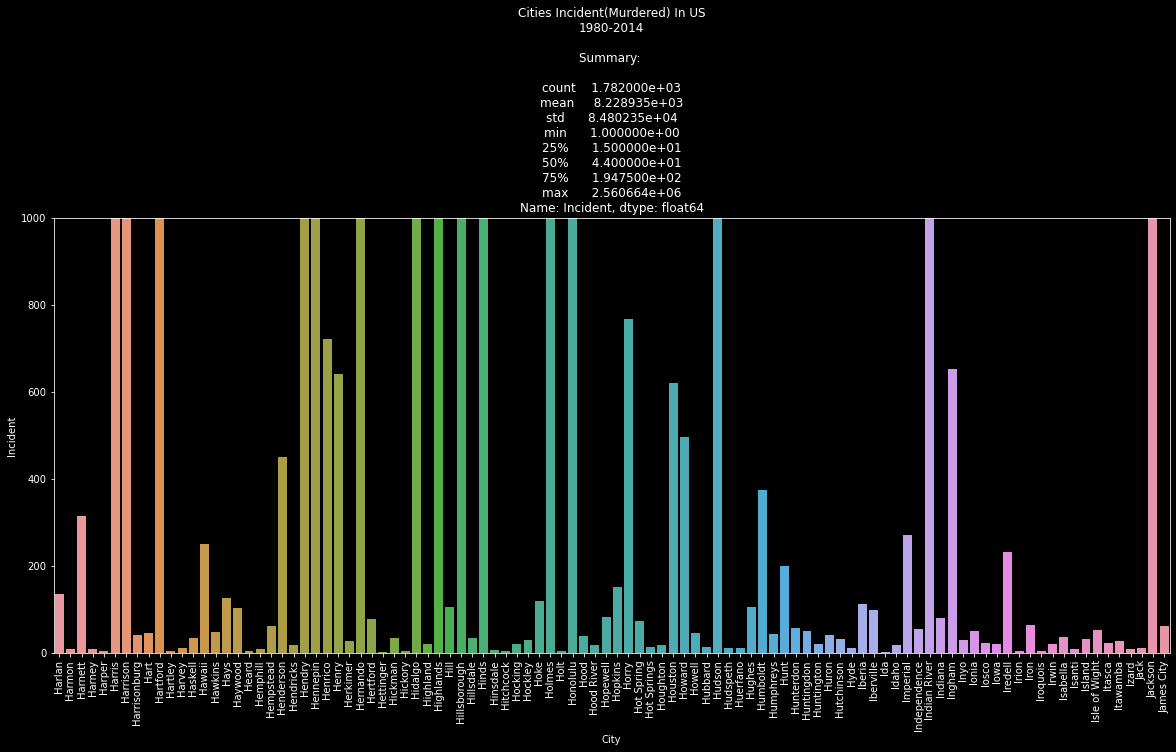

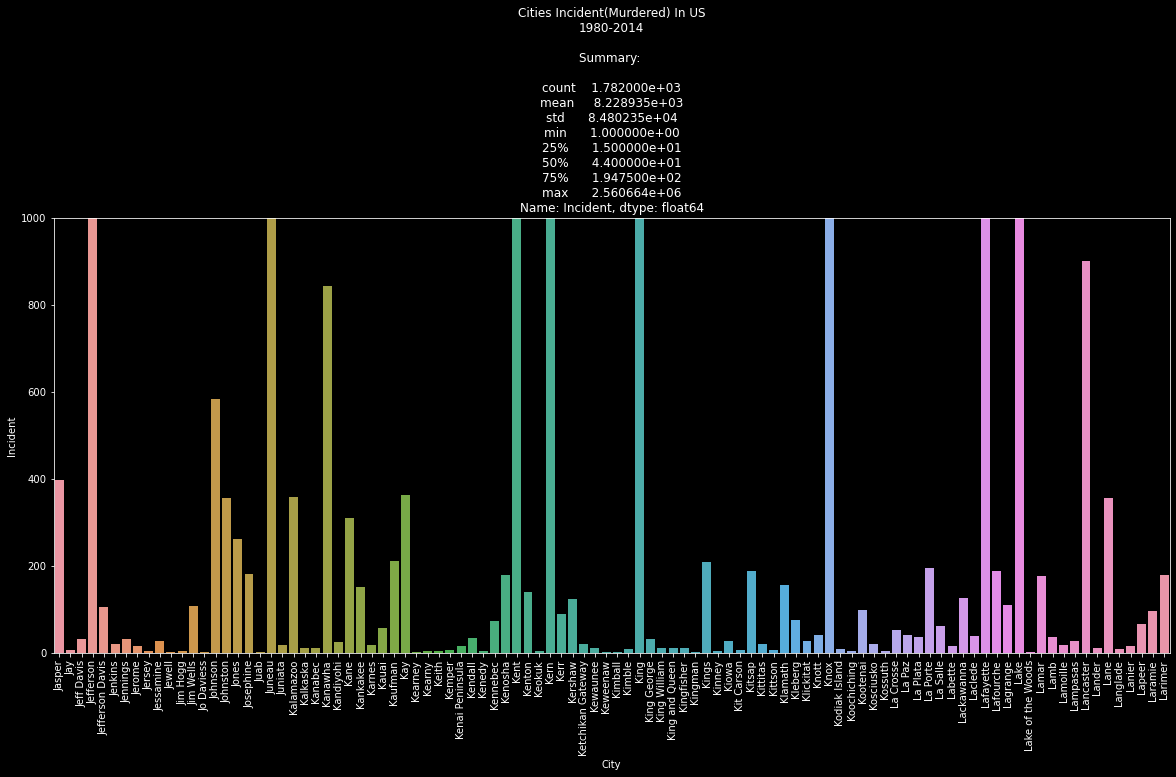

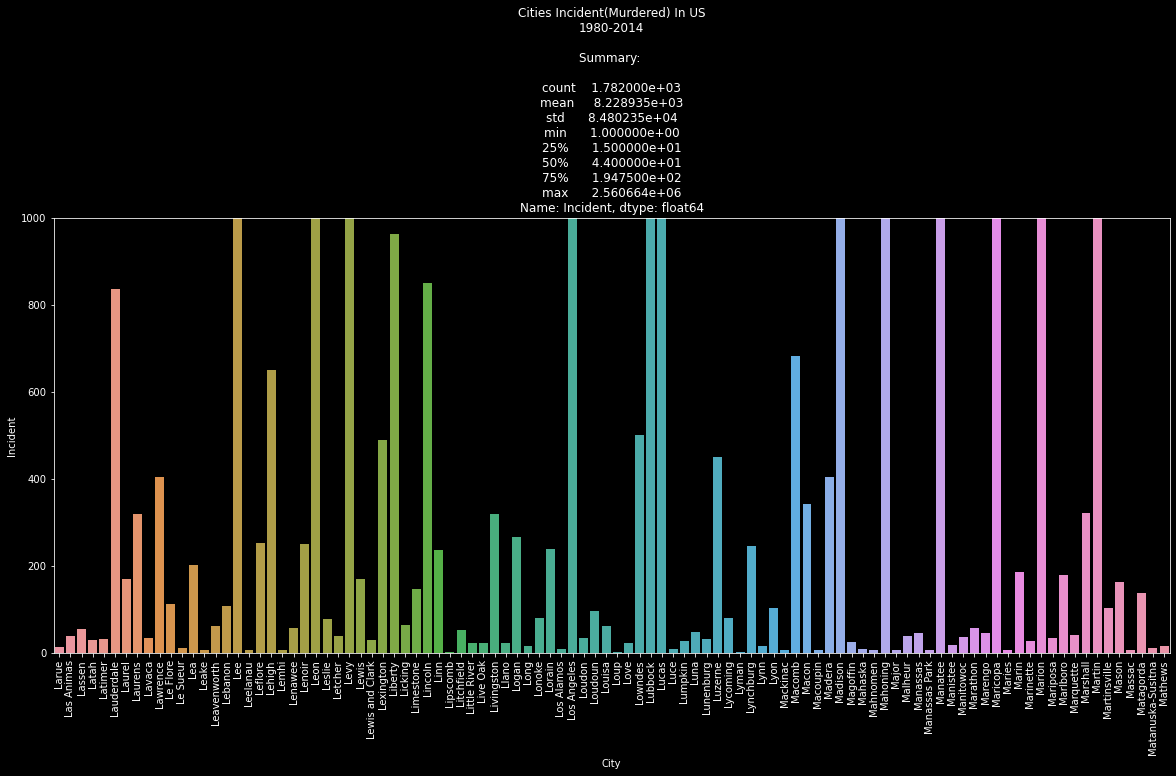

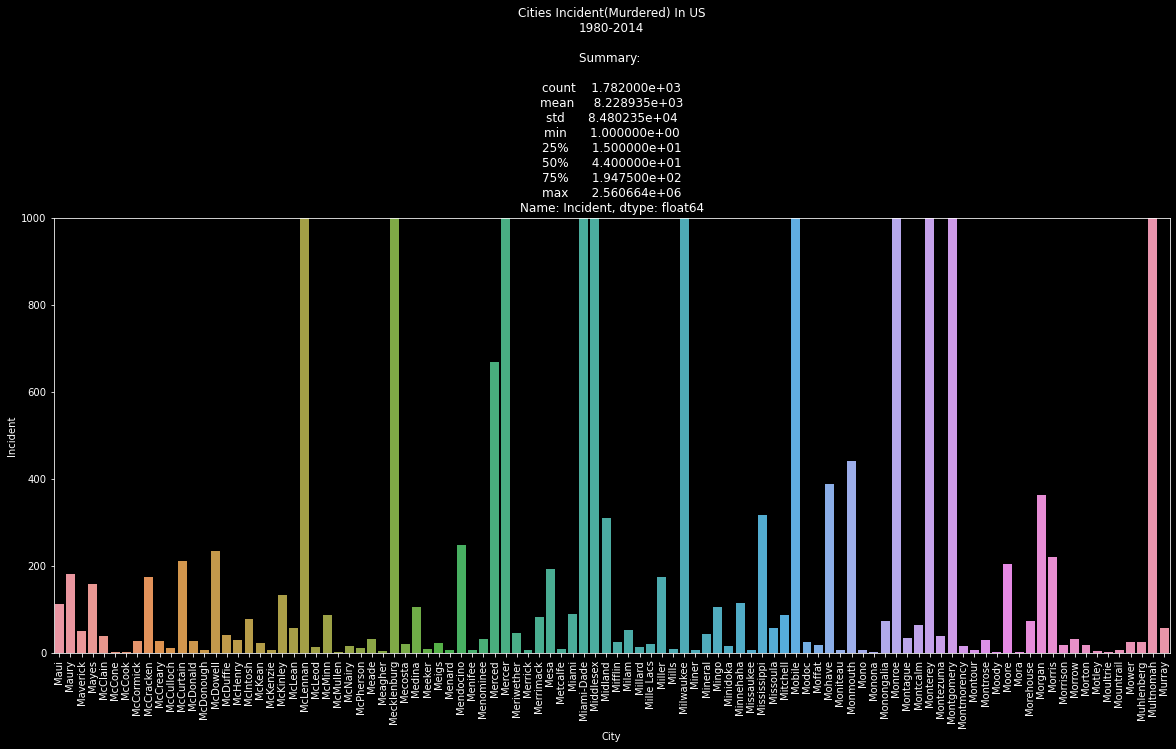

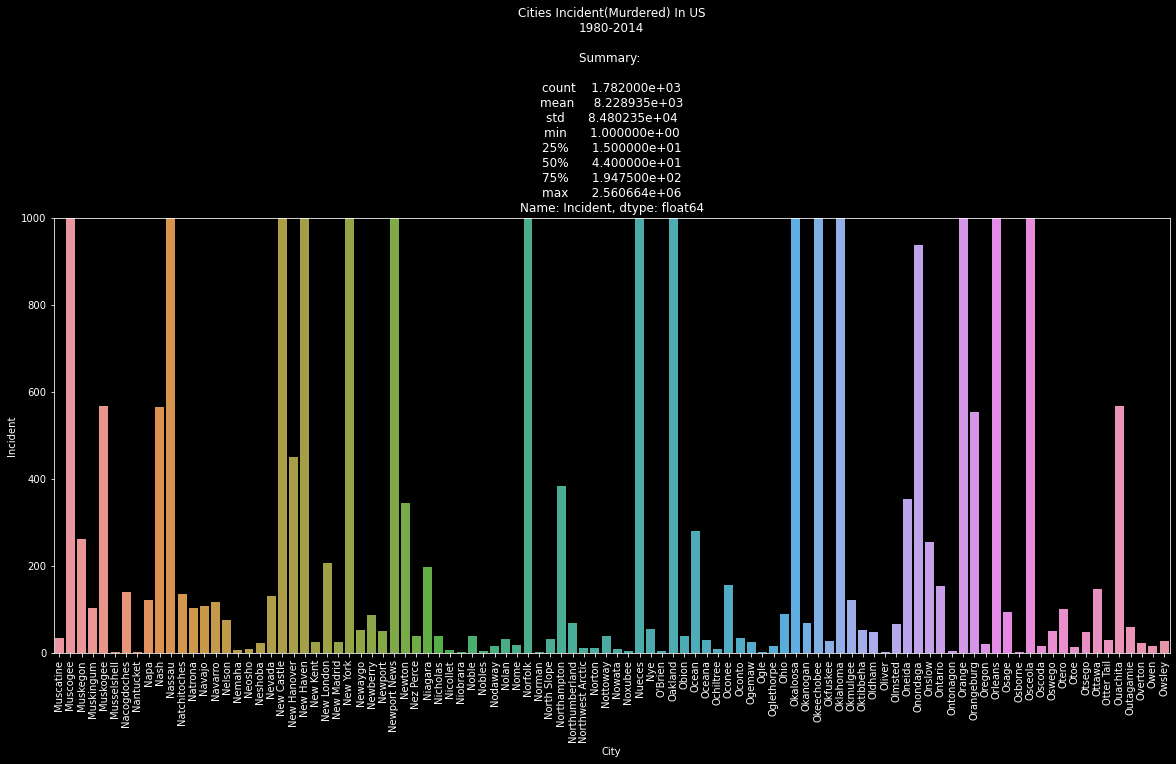

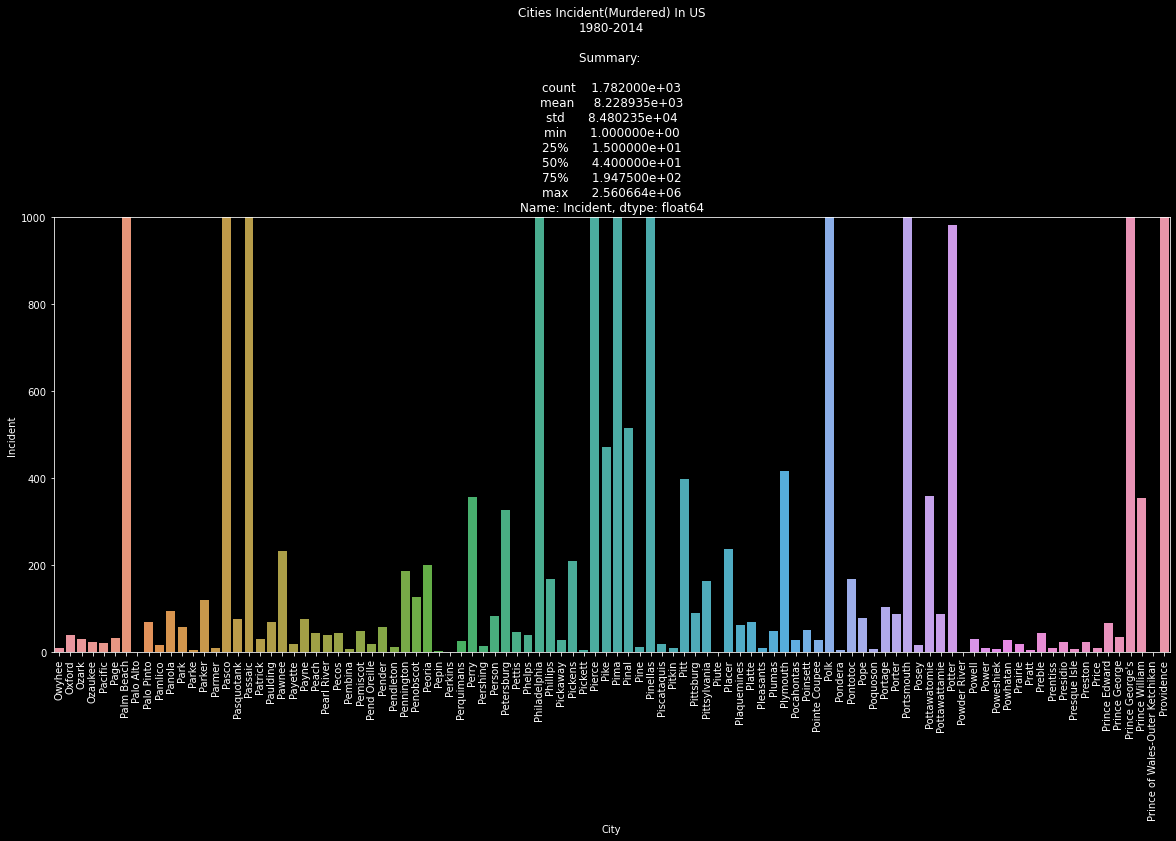

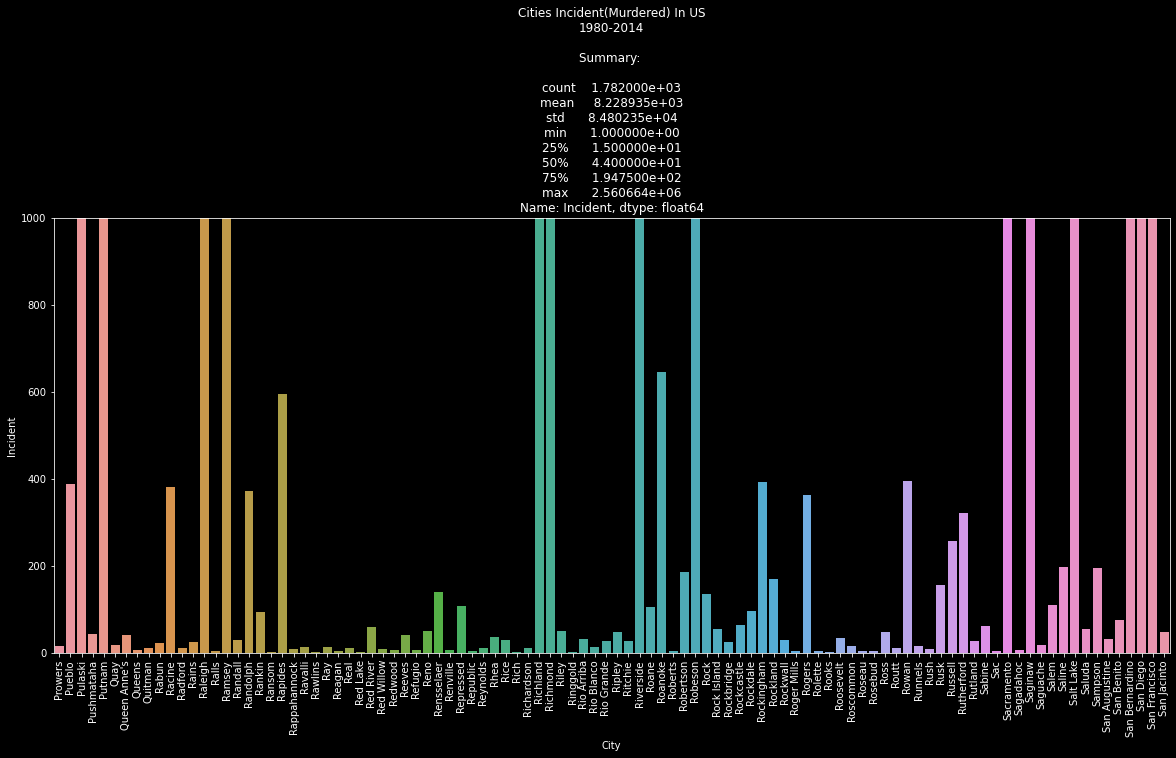

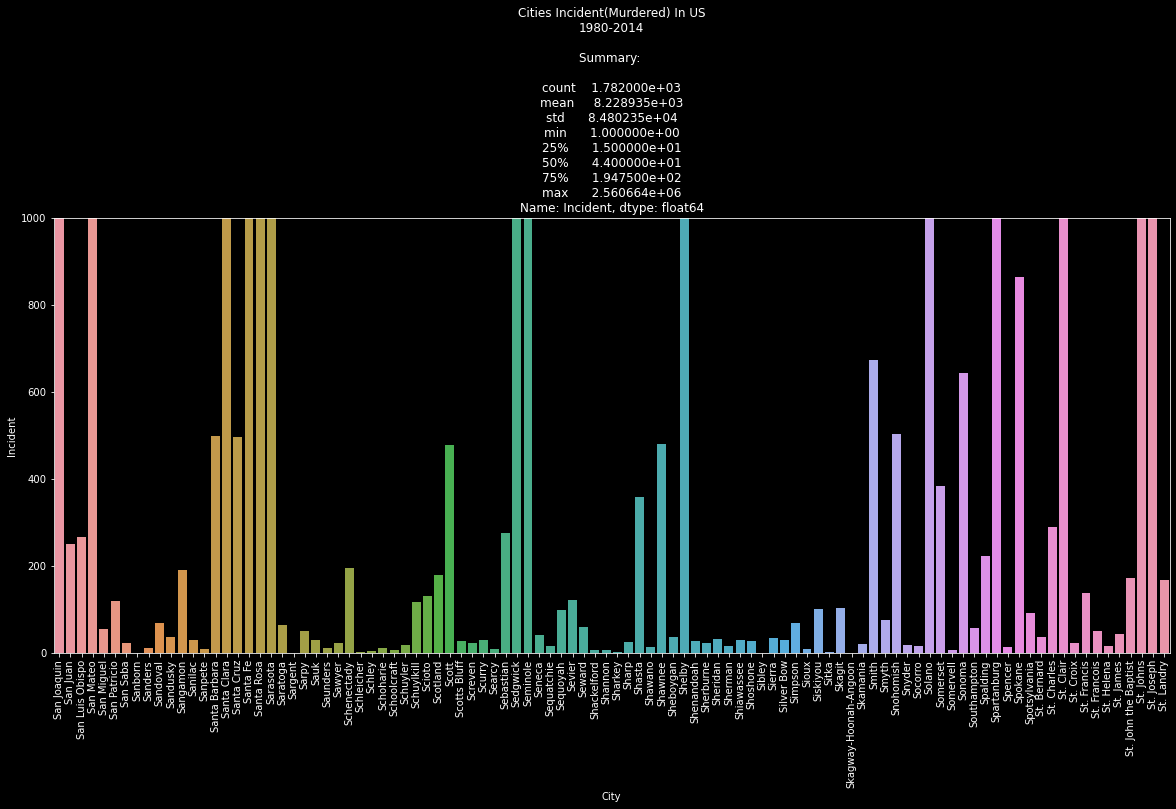

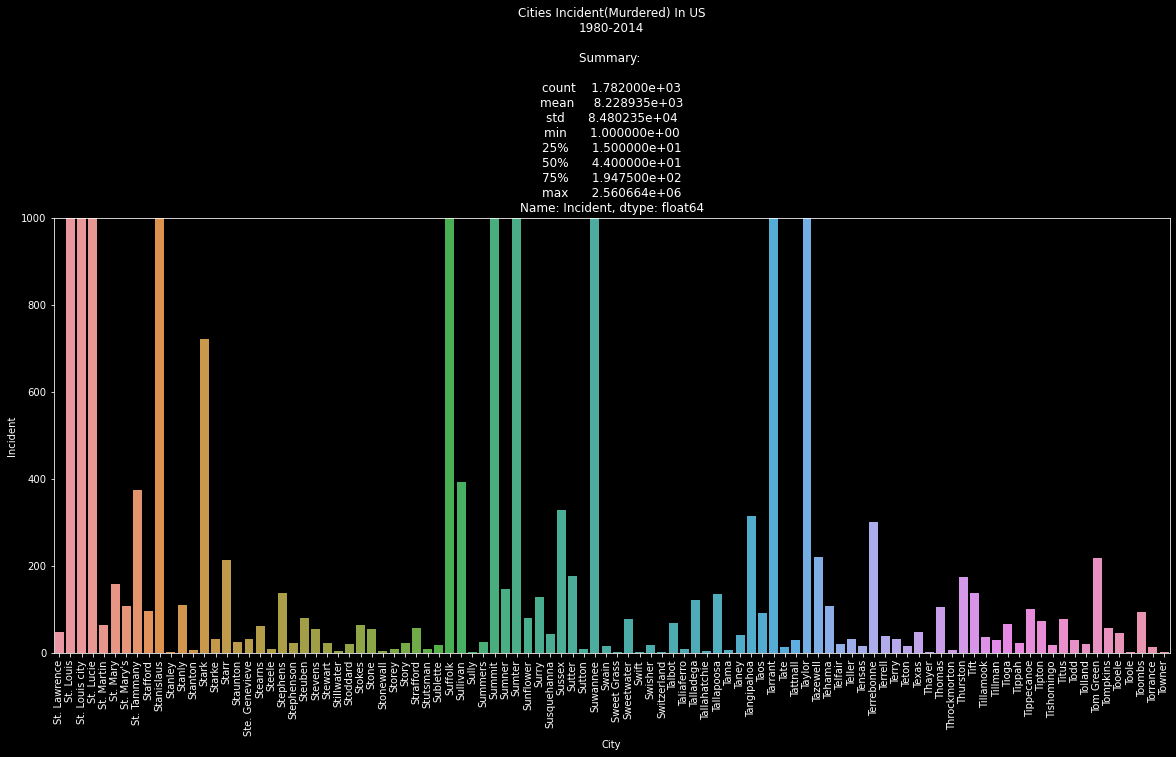

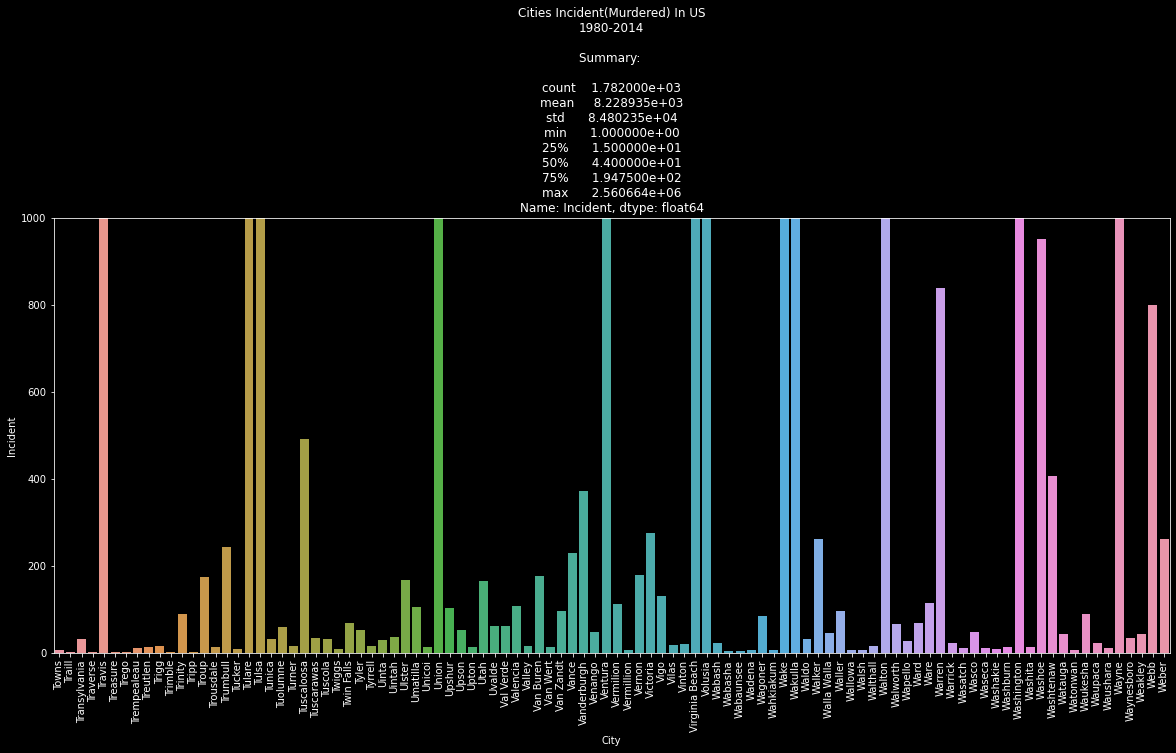

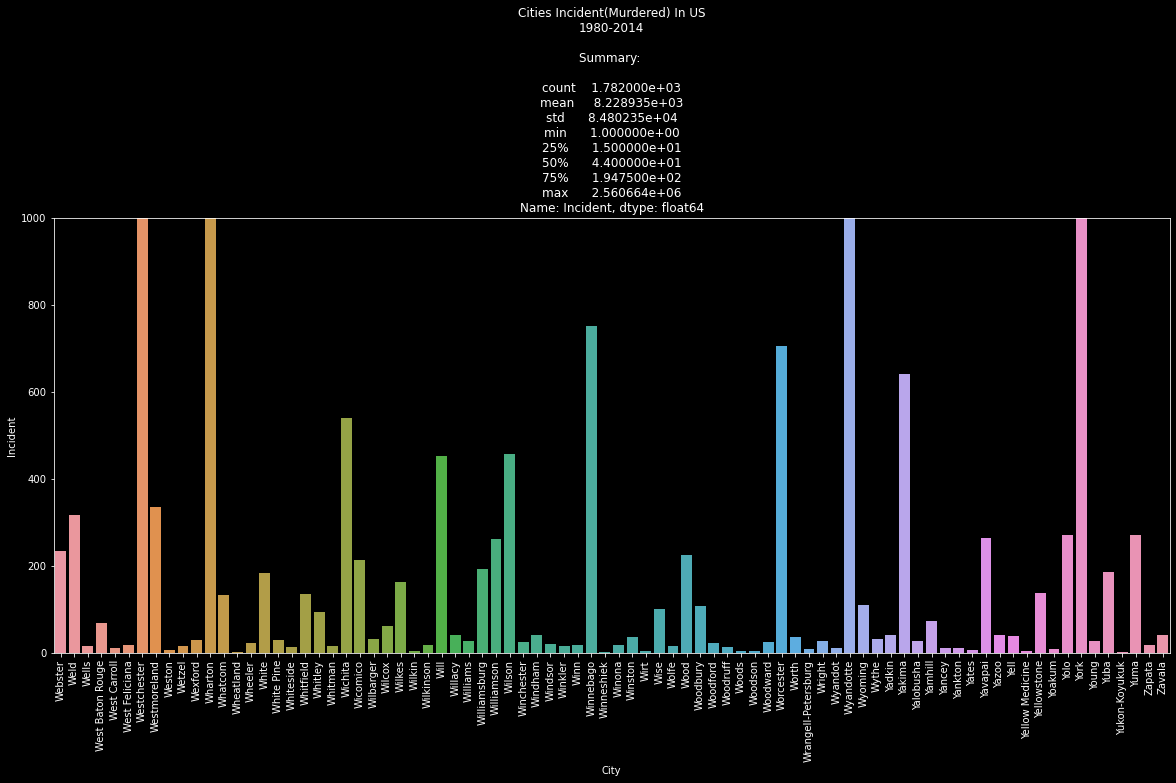

In [43]:
i = 0
range_j = range(1,18)
while i < 1700:
    for j in range_j:
    
        plt.figure(figsize=(20,8))
        sns.barplot(cities.index[i:j*100], cities[i:j*100])
        plt.xticks(rotation= 'vertical')
        plt.ylim([0,1000])
        plt.title(f'Cities Incident(Murdered) In US\n1980-2014\n\nSummary: \n\n{cities_describe}')
        plt.show()

        i += 100
        j += 1
    
    
plt.figure(figsize=(20,8))
sns.barplot(cities.index[1700:], cities[1700:])
plt.xticks(rotation= 'vertical')
plt.ylim([0,1000])
plt.title(f'Cities Incident(Murdered) In US\n1980-2014\n\nSummary: \n\n{cities_describe}')
plt.show()

In [44]:
data_matrix = df[['Victim Sex', 'Perpetrator Sex','Victim Age','Perpetrator Age', 
                  'Victim Count', 'Perpetrator Count', 'City', 'State','Year', 
                  'Month', 'Incident', 'Relationship', 'Weapon','Crime Type','Crime Solved']]

In [45]:
data_matrix.head()

,Victim Sex,Perpetrator Sex,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,City,State,Year,Month,Incident,Relationship,Weapon,Crime Type,Crime Solved
0,Male,Male,14,15,0,0,Anchorage,Alaska,1980,January,1,Acquaintance,Blunt Object,Murder or Manslaughter,Yes
1,Male,Male,43,42,0,0,Anchorage,Alaska,1980,March,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes
2,Female,Unknown,30,0,0,0,Anchorage,Alaska,1980,March,2,Unknown,Unknown,Murder or Manslaughter,No
3,Male,Male,43,42,0,0,Anchorage,Alaska,1980,April,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes
4,Female,Unknown,30,0,0,1,Anchorage,Alaska,1980,April,2,Unknown,Unknown,Murder or Manslaughter,No


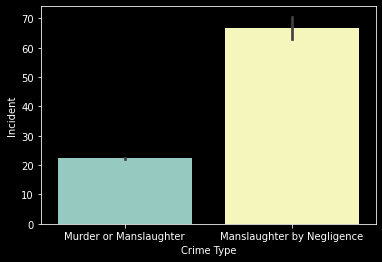

In [46]:
import seaborn as sns
sns.barplot(data_matrix['Crime Type'], data_matrix['Incident'])

In [47]:
crime_type_gb = data_matrix.groupby('Crime Type')['Incident'].sum()

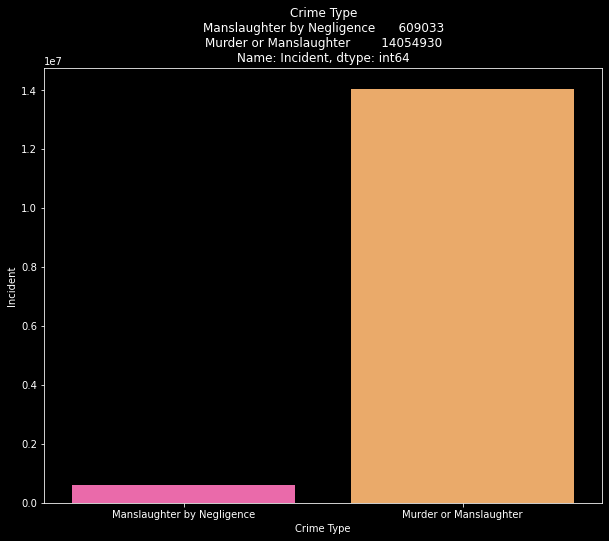

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(crime_type_gb.index, crime_type_gb, palette= 'spring')
plt.title(f'{crime_type_gb}')
plt.show()

In [49]:
total_incident = crime_type_gb[0] + crime_type_gb[1]
negligence_percentage = (crime_type_gb[0] / total_incident) * 100
not_negligence_percentge = (crime_type_gb[1] / total_incident) *100

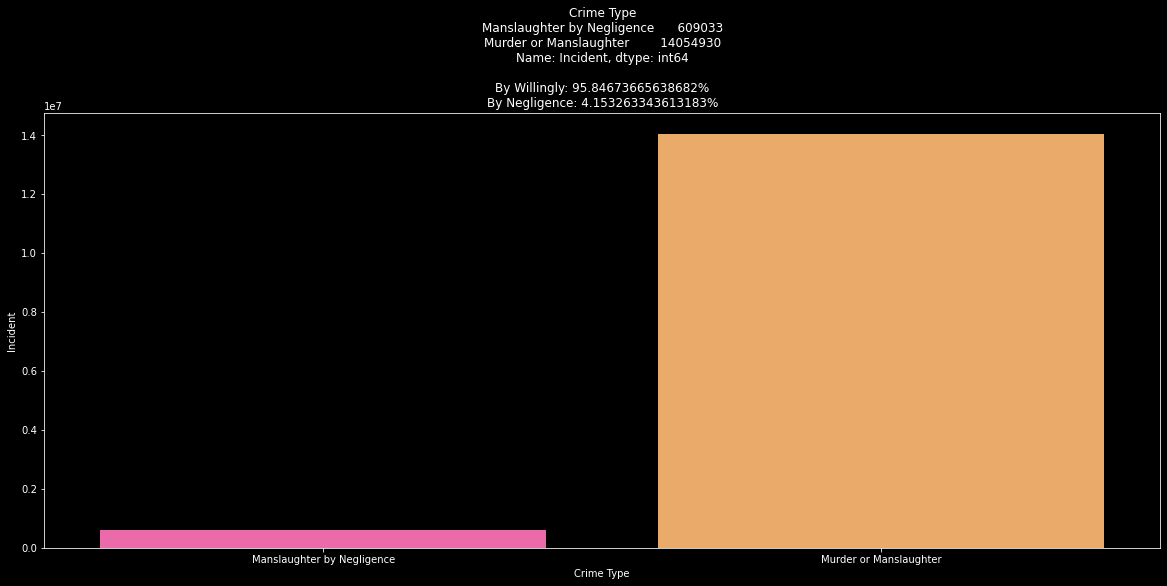

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(crime_type_gb.index, crime_type_gb, palette= 'spring')
plt.title(f'{crime_type_gb}\n\nBy Willingly: {not_negligence_percentge}%\nBy Negligence: {negligence_percentage}%')
plt.show()

In [51]:
data_matrix.head()

,Victim Sex,Perpetrator Sex,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,City,State,Year,Month,Incident,Relationship,Weapon,Crime Type,Crime Solved
0,Male,Male,14,15,0,0,Anchorage,Alaska,1980,January,1,Acquaintance,Blunt Object,Murder or Manslaughter,Yes
1,Male,Male,43,42,0,0,Anchorage,Alaska,1980,March,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes
2,Female,Unknown,30,0,0,0,Anchorage,Alaska,1980,March,2,Unknown,Unknown,Murder or Manslaughter,No
3,Male,Male,43,42,0,0,Anchorage,Alaska,1980,April,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes
4,Female,Unknown,30,0,0,1,Anchorage,Alaska,1980,April,2,Unknown,Unknown,Murder or Manslaughter,No


In [52]:
def perpetartor_count_wise(i, name):
    perpetrator = data_matrix.loc[data_matrix['Perpetrator Count'] == i]
    perpetrator_percentage = (len(perpetrator) / len(data_matrix)) * 100
    perpetrator_percentage
    print(f'{name} Perpetrator: \t{perpetrator_percentage}%')

    
perpetartor_count_wise(0, '0')    
perpetartor_count_wise(1, 'Individual')
perpetartor_count_wise(2, 'Two')
perpetartor_count_wise(3, 'Three')
perpetartor_count_wise(4, 'Four')
perpetartor_count_wise(5, 'Five')
perpetartor_count_wise(6, 'Six')
perpetartor_count_wise(7, 'Seven')
perpetartor_count_wise(8, 'Eight')
perpetartor_count_wise(9, 'Nine')
perpetartor_count_wise(10, 'Ten')

0 Perpetrator: 	87.529876858787%
Individual Perpetrator: 	8.574619314782272%
Two Perpetrator: 	2.4711255626873667%
Three Perpetrator: 	1.0229397889276282%
Four Perpetrator: 	0.23321962114733405%
Five Perpetrator: 	0.09272398637959822%
Six Perpetrator: 	0.032422069561785186%
Seven Perpetrator: 	0.020205057842851638%
Eight Perpetrator: 	0.008144674479289033%
Nine Perpetrator: 	0.008144674479289033%
Ten Perpetrator: 	0.006578390925579604%


In [53]:
def perpetartor_count_df(i):
    perpetrator = data_matrix.loc[data_matrix['Perpetrator Count'] == i]
    return perpetrator


perpetrator0 = perpetartor_count_df(0)
perpetrator1 = perpetartor_count_df(1)
perpetrator2 = perpetartor_count_df(2)
perpetrator3 = perpetartor_count_df(3)
perpetrator4 = perpetartor_count_df(4)
perpetrator5 = perpetartor_count_df(5)
perpetrator6 = perpetartor_count_df(6)
perpetrator7 = perpetartor_count_df(7)
perpetrator8 = perpetartor_count_df(8)
perpetrator9 = perpetartor_count_df(9)
perpetrator10 = perpetartor_count_df(10)

In [54]:
def perpetartor_gb(df):
    perpetrator_gb = df.groupby('Relationship')['Incident'].sum()
    return perpetrator_gb

perpetrator0_gb = perpetartor_gb(perpetrator0)
perpetrator1_gb = perpetartor_gb(perpetrator1)
perpetrator2_gb = perpetartor_gb(perpetrator2)
perpetrator3_gb = perpetartor_gb(perpetrator3)
perpetrator4_gb = perpetartor_gb(perpetrator4)
perpetrator5_gb = perpetartor_gb(perpetrator5)
perpetrator6_gb = perpetartor_gb(perpetrator6)
perpetrator7_gb = perpetartor_gb(perpetrator7)
perpetrator8_gb = perpetartor_gb(perpetrator8)
perpetrator9_gb = perpetartor_gb(perpetrator9)
perpetrator10_gb = perpetartor_gb(perpetrator10)

In [55]:
perpetrator_all = data_matrix.groupby('Relationship')['Incident'].sum()
perpetrator_all

Relationship
Acquaintance              867173
Boyfriend                  48931
Boyfriend/Girlfriend       12389
Brother                    80297
Common-Law Husband         24004
Common-Law Wife            28959
Daughter                  154831
Employee                    1383
Employer                    3322
Ex-Husband                  2399
Ex-Wife                     6097
Family                    228327
Father                     93302
Friend                    268593
Girlfriend                 93297
Husband                   111806
In-Law                     15344
Mother                     89224
Neighbor                   31760
Sister                     19473
Son                       218332
Stepdaughter                2447
Stepfather                  5517
Stepmother                   549
Stepson                     5480
Stranger                 1138705
Unknown                 10608316
Wife                      503706
Name: Incident, dtype: int64

In [56]:
def perpetartor_count_wise_(i, name):
    perpetrator = data_matrix.loc[data_matrix['Perpetrator Count'] == i]
    perpetrator_percentage = (len(perpetrator) / len(data_matrix)) * 100
    perpetrator_percentage
    formated = f'{i} Perpetrator: {perpetrator_percentage}%'
    return formated

title = perpetartor_count_wise_(0, 'individual')
title

'0 Perpetrator: 87.529876858787%'

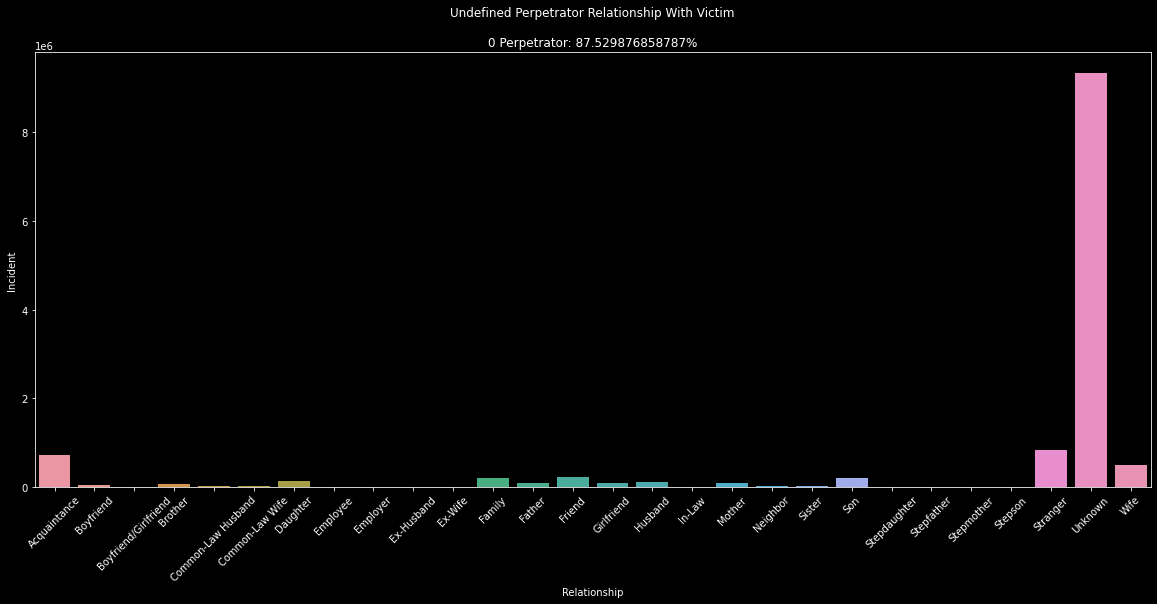

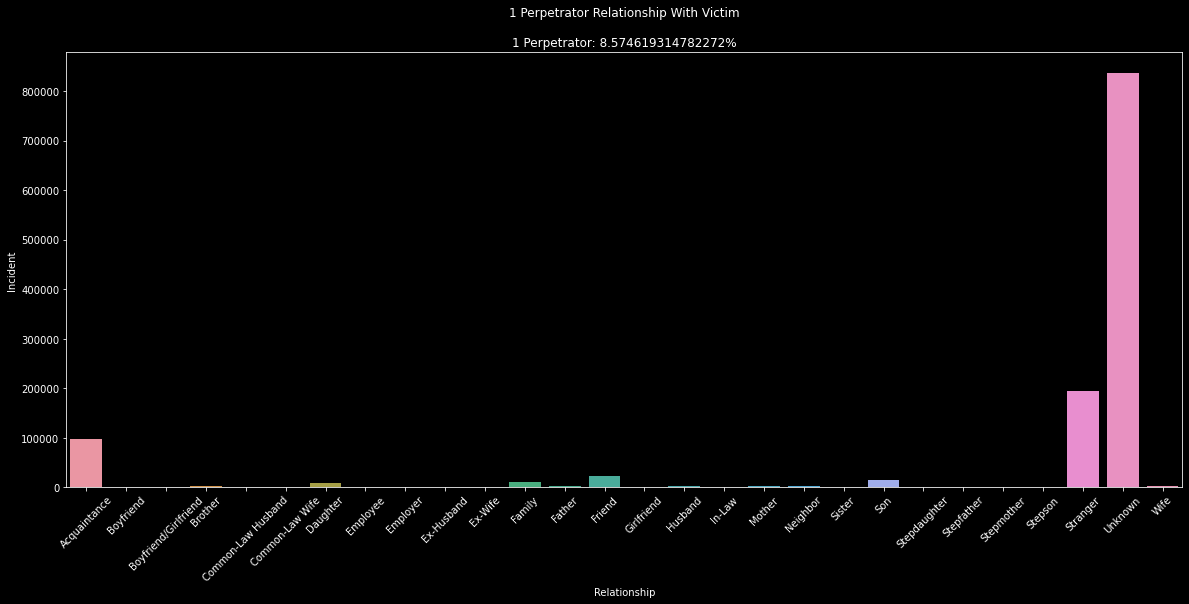

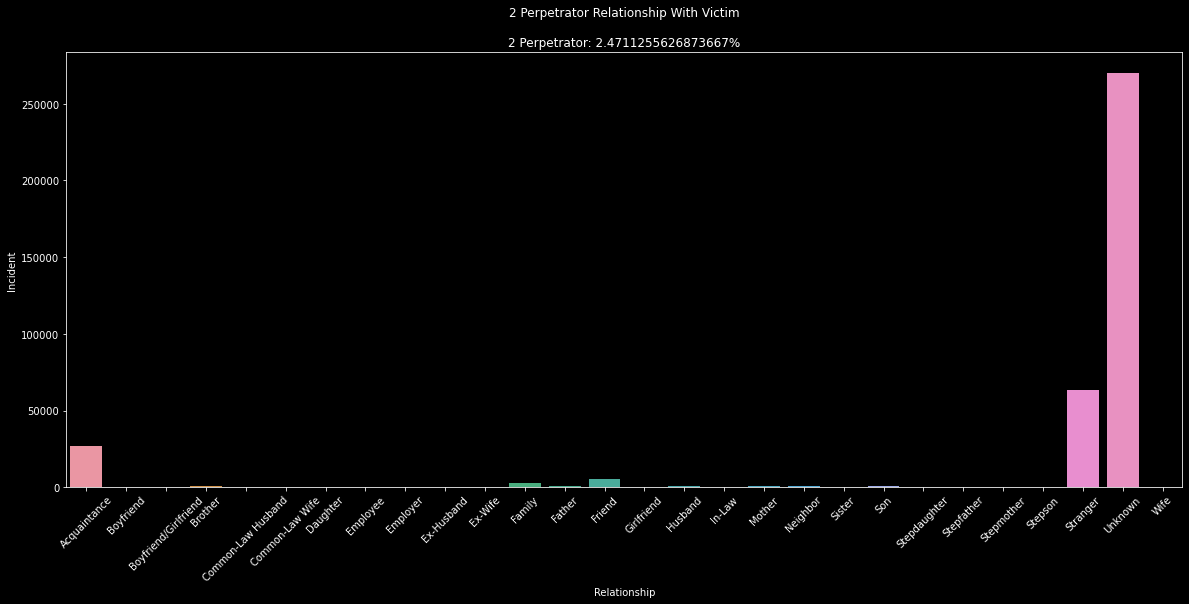

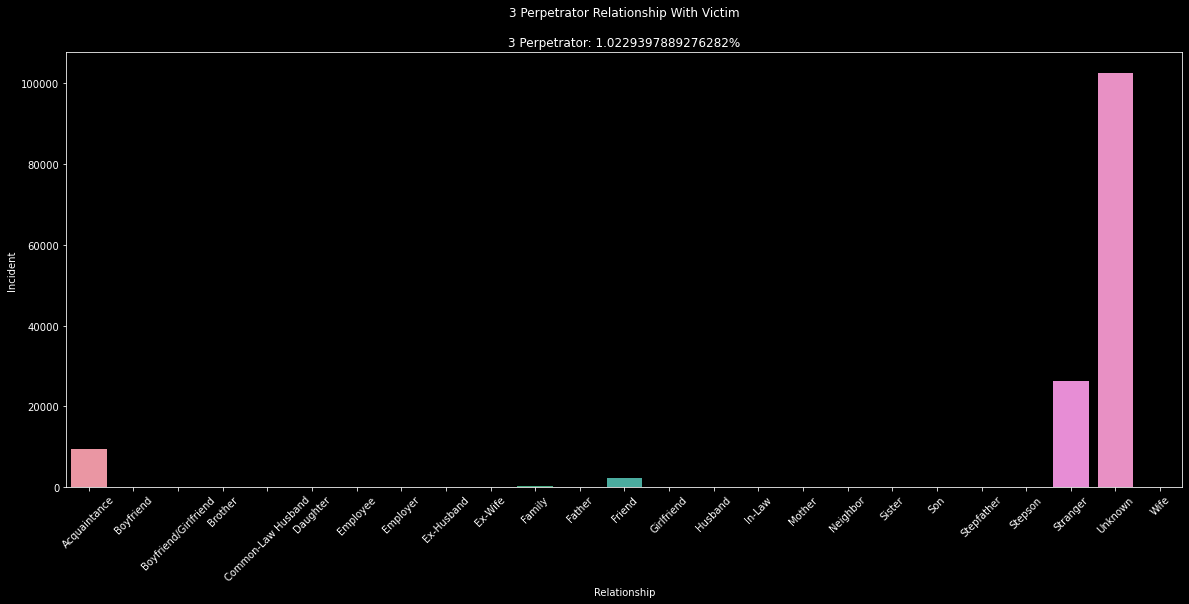

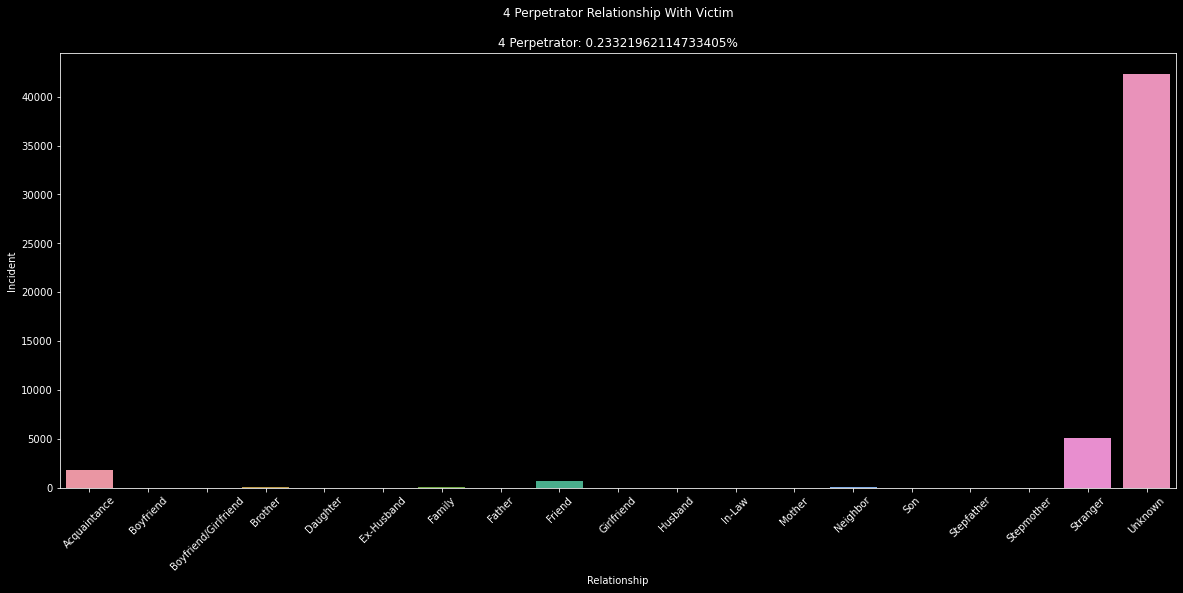

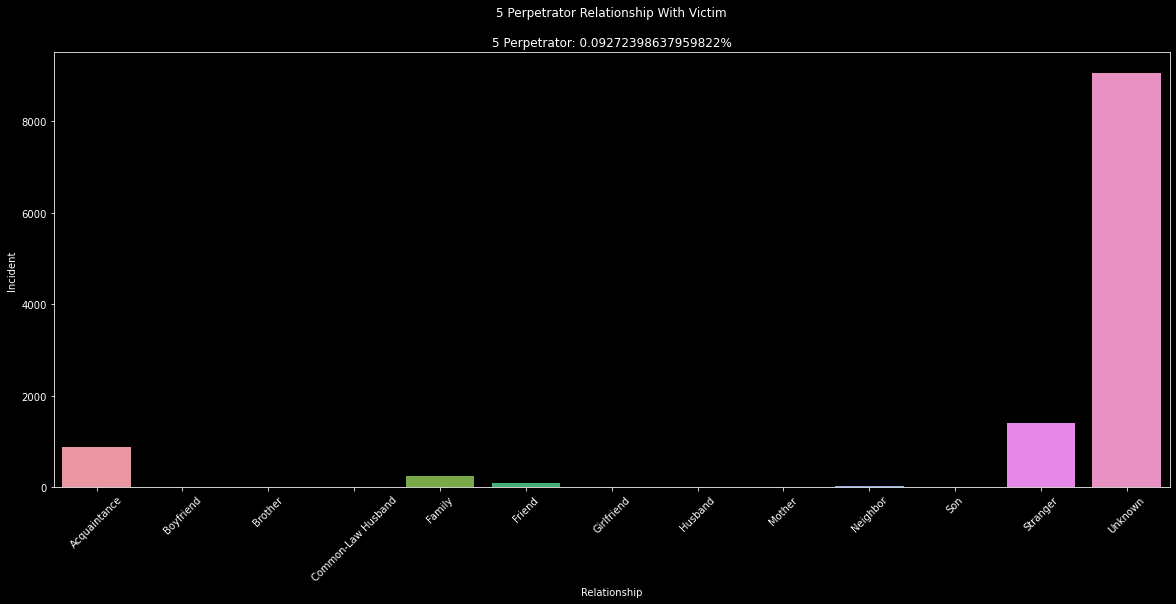

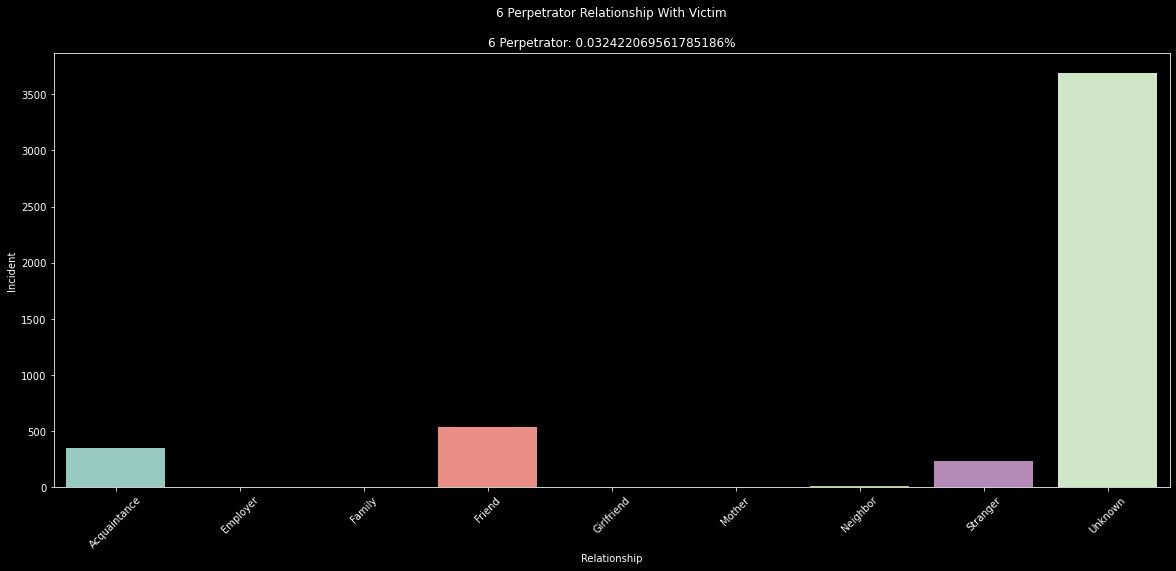

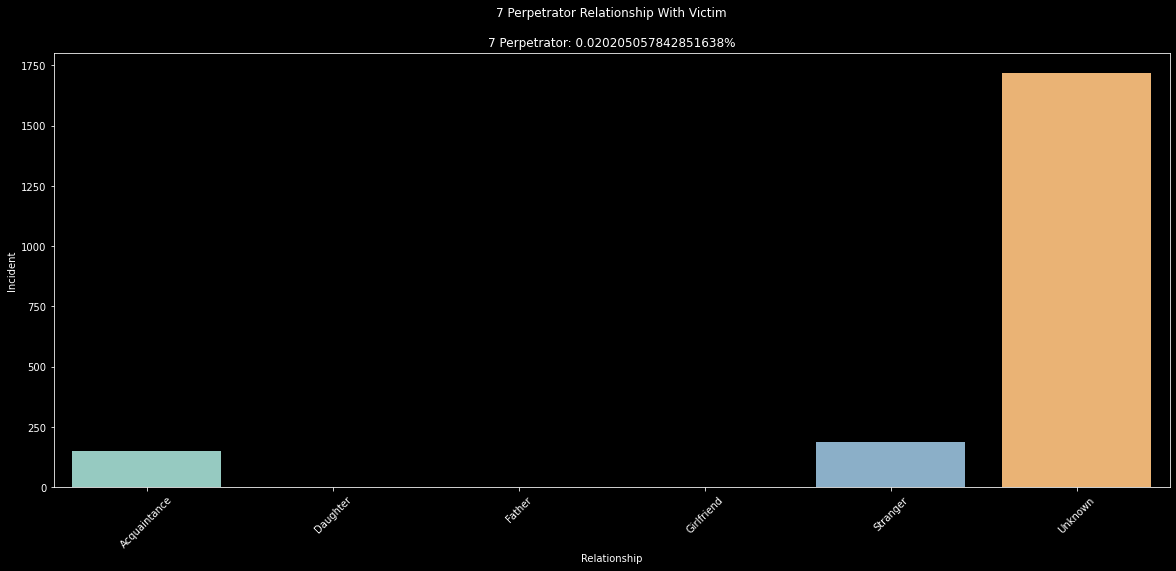

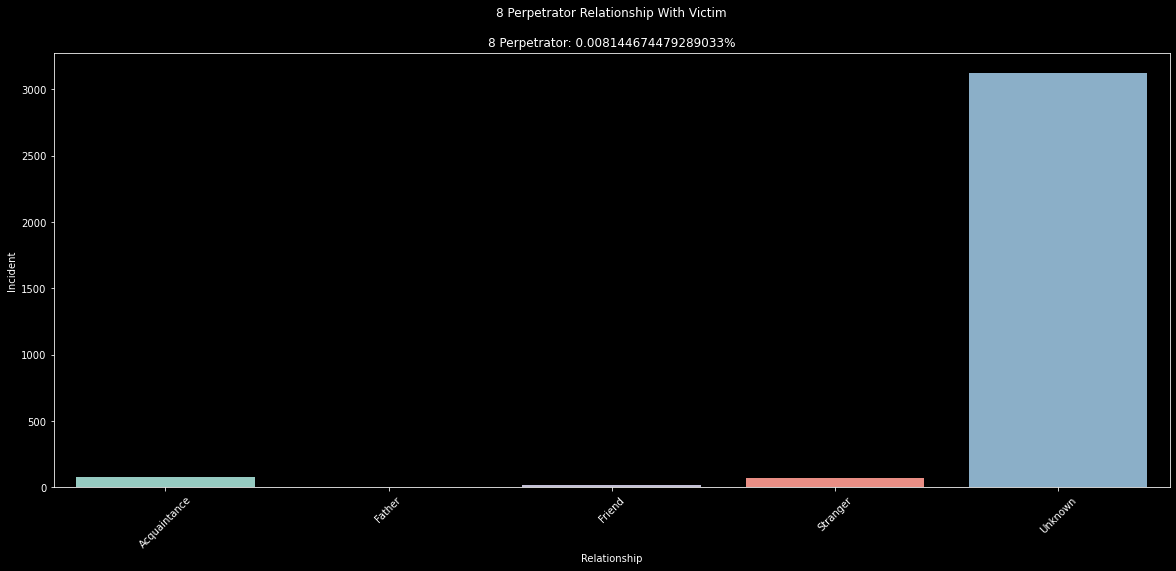

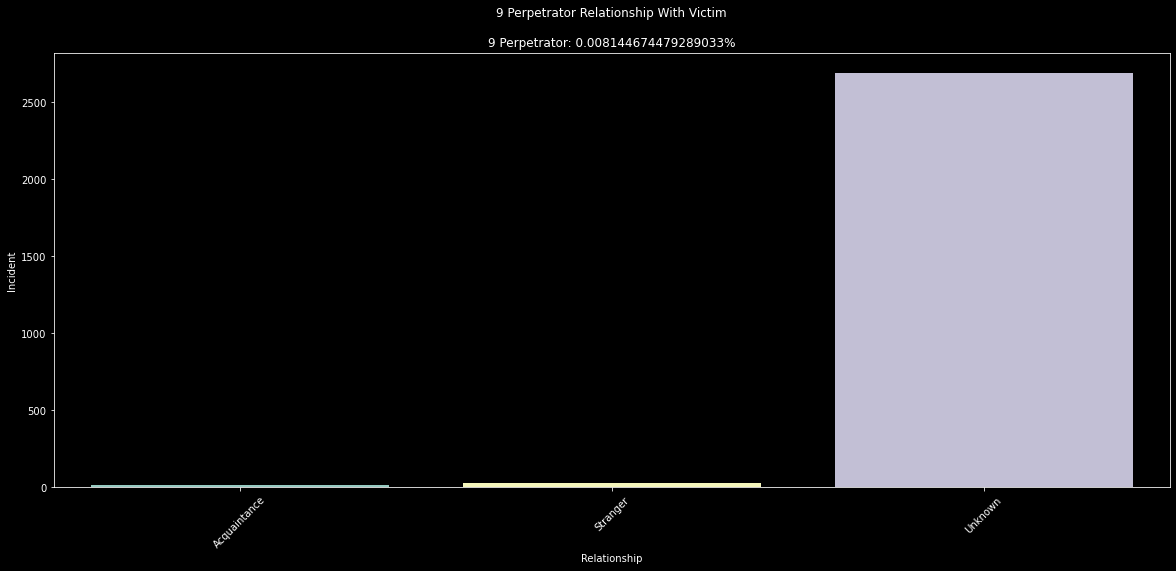

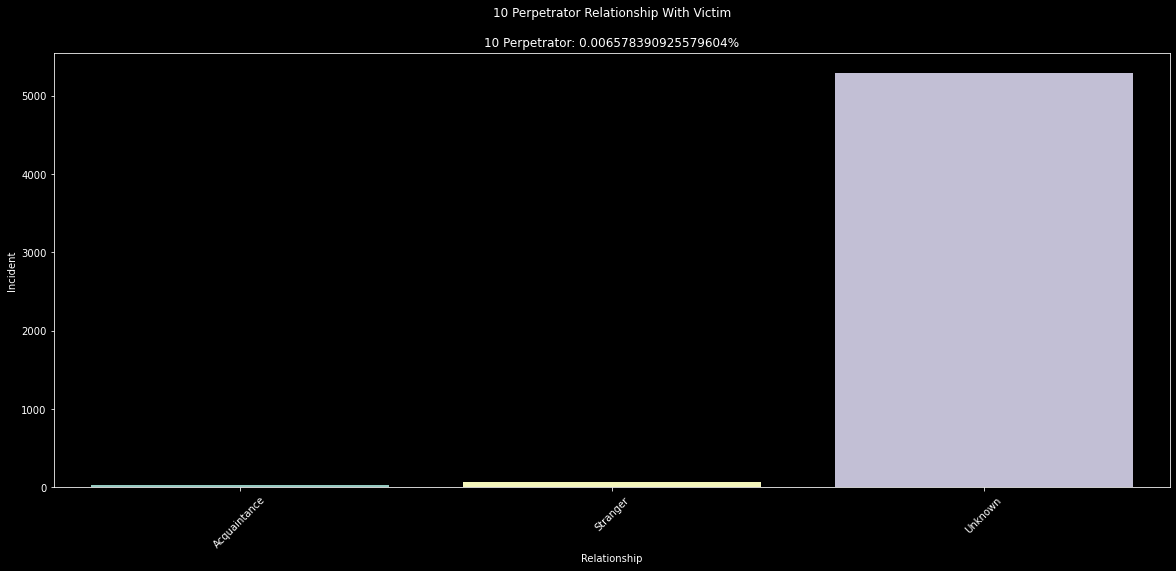

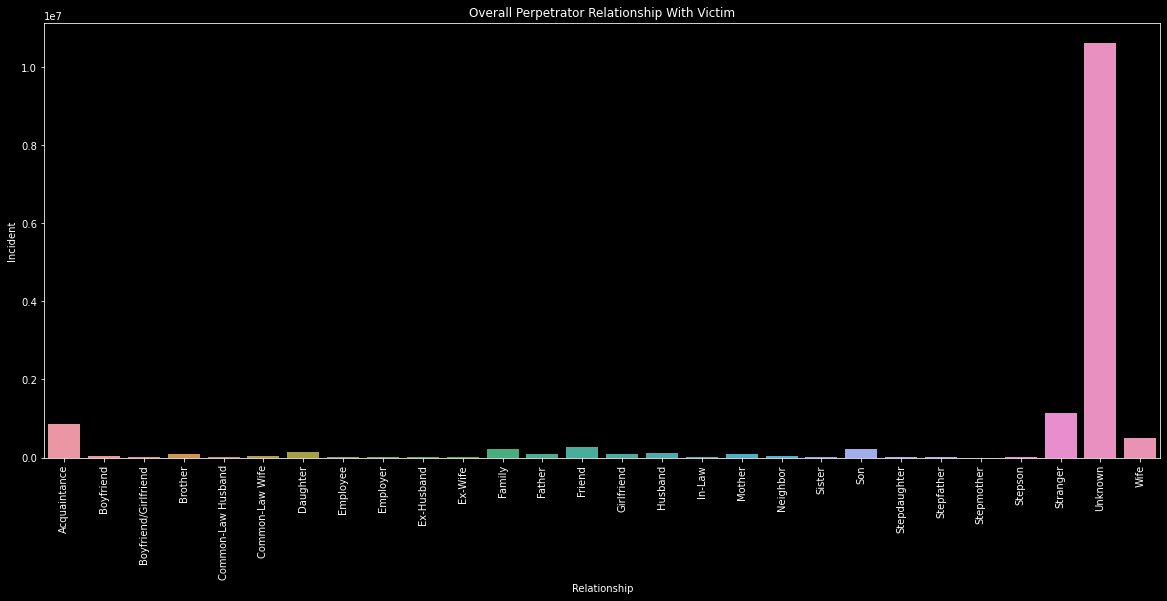

In [57]:
overall_perpetrator = data_matrix.groupby('Relationship')['Incident'].sum()


def relationship_plot(var, name, i):
    plt.figure(figsize = (20,8))

    sns.barplot(var.index, var)
    percentages = perpetartor_count_wise_(i, name)
    title = f'{name} Perpetrator Relationship With Victim\n\n{percentages}'
    plt.xticks(rotation = 45)
    plt.title(title)
    plt.show()

    
    
relationship_plot(perpetrator0_gb, 'Undefined',0)
relationship_plot(perpetrator1_gb, 1, 1)
relationship_plot(perpetrator2_gb, 2,2)
relationship_plot(perpetrator3_gb, 3,3)
relationship_plot(perpetrator4_gb, 4,4)
relationship_plot(perpetrator5_gb, 5,5)
relationship_plot(perpetrator6_gb, 6,6)
relationship_plot(perpetrator7_gb, 7,7)
relationship_plot(perpetrator8_gb, 8,8)
relationship_plot(perpetrator9_gb, 9,9)
relationship_plot(perpetrator10_gb, 10,10)



plt.figure(figsize = (20,8))

sns.barplot(overall_perpetrator.index, overall_perpetrator)
plt.xticks(rotation = 'vertical')
title = 'Overall Perpetrator Relationship With Victim'
plt.title(title)
plt.show()


In [59]:
def return_arguments_var(data, series1, value1, series2 = None, value2= None):
    if series2:
        args = data.loc[(data[series1] == value1) & (data[series2] == value2)]
        
    else:
        args = data.loc[(data[series1] == value1)]
    return args


unsolved_cases = return_arguments_var(data_matrix,'Crime Solved', 'No')
all_cases_done_by_unknown = return_arguments_var(data_matrix, 'Relationship', 'Unknown')

In [61]:
print(f'Number of Cases Didnt Solved: {len(unsolved_cases)}')
print(f'Percentage Crime Didnt Solved: {(len(unsolved_cases)/len(data_matrix))*100}%')
print(f'Percentage Crime Done by Unknown: {(len(all_cases_done_by_unknown)/len(data_matrix))*100}%')

unknown_and_not_solved = data_matrix.loc[(data_matrix['Relationship'] == 'Unknown') & (data_matrix['Crime Solved'] == 'No')]
print(f'Number of Crime has done by Unknown and Hasnt Solved: {len(unknown_and_not_solved)}')
print(f'Percentage Crime Done By Unknown and Hasnt Solved: {(len(unknown_and_not_solved)/len(data_matrix))*100}%')

Number of Cases Didnt Solved: 190282
Percentage Crime Didnt Solved: 29.803556716693762%
Percentage Crime Done by Unknown: 42.761577184887244%
Number of Crime has done by Unknown and Hasnt Solved: 178121
Percentage Crime Done By Unknown and Hasnt Solved: 27.898799287027725%


### Among All Cases, 29.8% is Unsolved. In 29.8% Unsolved Cases About 27% has been done by Unknown..

In [62]:
print(len(perpetrator0))
print(len(all_cases_done_by_unknown))

558838
273013


In [63]:
perpetrator0_unknown = return_arguments_var(data_matrix, 'Relationship','Unknown', 'Perpetrator Count', 0)

In [64]:
perpetrator0_unknown.shape

(244842, 15)

In [65]:
print(f'Percentage of Crime Unknown Vs 0 Perpetarator:\n {(len(all_cases_done_by_unknown) / len(perpetrator0))*100}%')

Percentage of Crime Unknown Vs 0 Perpetarator:
 48.853692841216954%


### About 48.853% of Perpetrator Count 0 is Unknown

In [66]:
year1980 = return_arguments_var(data_matrix, 'Year', 1980)
year1981 = return_arguments_var(data_matrix, 'Year', 1981)
year1982 = return_arguments_var(data_matrix, 'Year', 1982)
year1983 = return_arguments_var(data_matrix, 'Year', 1983)
year1984 = return_arguments_var(data_matrix, 'Year', 1984)
year1985 = return_arguments_var(data_matrix, 'Year', 1985)
year1986 = return_arguments_var(data_matrix, 'Year', 1986)
year1987 = return_arguments_var(data_matrix, 'Year', 1987)
year1988 = return_arguments_var(data_matrix, 'Year', 1988)
year1989 = return_arguments_var(data_matrix, 'Year', 1989)
year1990 = return_arguments_var(data_matrix, 'Year', 1990)
year1991 = return_arguments_var(data_matrix, 'Year', 1991)
year1992 = return_arguments_var(data_matrix, 'Year', 1992)
year1993 = return_arguments_var(data_matrix, 'Year', 1993)
year1994 = return_arguments_var(data_matrix, 'Year', 1994)
year1995 = return_arguments_var(data_matrix, 'Year', 1995)
year1996 = return_arguments_var(data_matrix, 'Year', 1996)
year1997 = return_arguments_var(data_matrix, 'Year', 1997)
year1998 = return_arguments_var(data_matrix, 'Year', 1998)
year1999 = return_arguments_var(data_matrix, 'Year', 1999)
year2000 = return_arguments_var(data_matrix, 'Year', 2000)
year2001 = return_arguments_var(data_matrix, 'Year', 2001)
year2002 = return_arguments_var(data_matrix, 'Year', 2002)
year2003 = return_arguments_var(data_matrix, 'Year', 2003)
year2004 = return_arguments_var(data_matrix, 'Year', 2004)
year2005 = return_arguments_var(data_matrix, 'Year', 2005)
year2006 = return_arguments_var(data_matrix, 'Year', 2006)
year2007 = return_arguments_var(data_matrix, 'Year', 2007)
year2008 = return_arguments_var(data_matrix, 'Year', 2008)
year2009 = return_arguments_var(data_matrix, 'Year', 2009)
year2010 = return_arguments_var(data_matrix, 'Year', 2010)
year2011 = return_arguments_var(data_matrix, 'Year', 2011)
year2012 = return_arguments_var(data_matrix, 'Year', 2012)
year2013 = return_arguments_var(data_matrix, 'Year', 2013)
year2014 = return_arguments_var(data_matrix, 'Year', 2014)





def groupby(data, series1, on_groupby):
    year = data.groupby(series1)[on_groupby].sum()
    return year


year_wise_incident = groupby(data_matrix, 'Year', 'Incident')
year_wise_victim = groupby(data_matrix, 'Year', 'Victim Count')
year_wise_perpetrator = groupby(data_matrix, 'Year', 'Perpetrator Count')
year_wise_crime_solved = groupby(data_matrix, 'Year', 'Crime Solved')

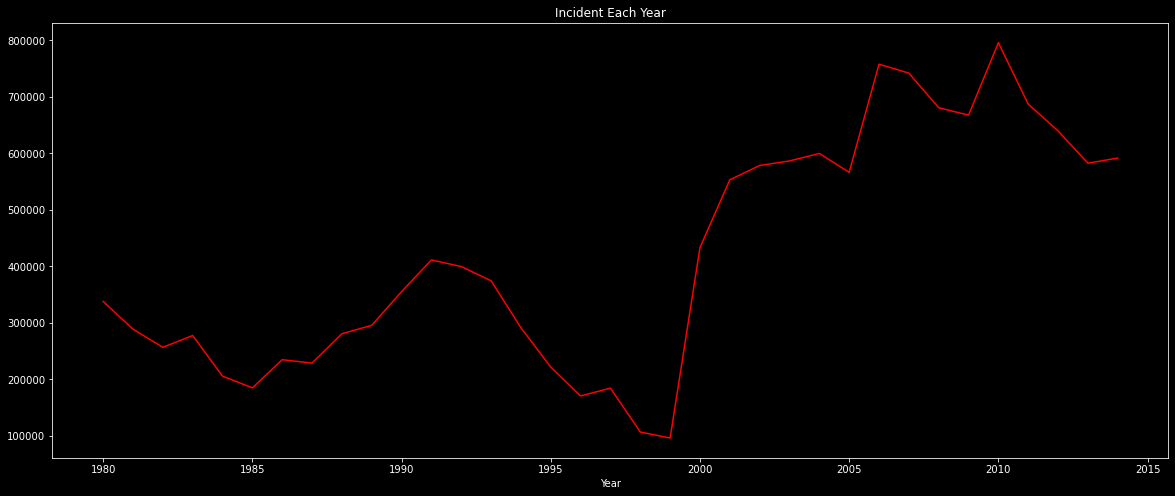

In [68]:
plt.figure(figsize=(20,8))
year_wise_incident.plot(c='r')
plt.title('Incident Each Year')
plt.show()

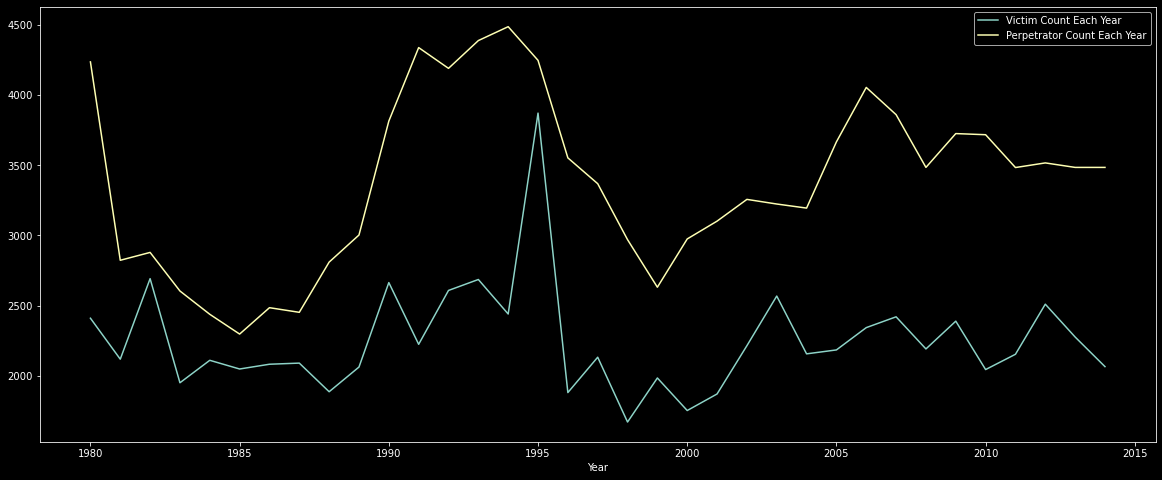

In [69]:
plt.figure(figsize=(20,8))
year_wise_victim.plot(label = 'Victim Count Each Year')
year_wise_perpetrator.plot(label = 'Perpetrator Count Each Year')
plt.legend(loc = 'best')

In [ ]:
def year_month_df(data):
    year_month = data.groupby('Month')['Incident'].sum()
    year_month = pd.DataFrame(year_month)
    return year_month
def year_month_decode(data, decode_list):
    year_month['MonthCode'] = decode_list
    return year_month

year1980.to_csv('../Data/CrimeYear1980.csv')
year1981.to_csv('../Data/CrimeYear1981.csv')
year1982.to_csv('../Data/CrimeYear1982.csv')
year1983.to_csv('../Data/CrimeYear1983.csv')
year1984.to_csv('../Data/CrimeYear1984.csv')
year1985.to_csv('../Data/CrimeYear1985.csv')
year1986.to_csv('../Data/CrimeYear1986.csv')
year1987.to_csv('../Data/CrimeYear1987.csv')
year1988.to_csv('../Data/CrimeYear1988.csv')
year1989.to_csv('../Data/CrimeYear1989.csv')
year1990.to_csv('../Data/CrimeYear1990.csv')
year1991.to_csv('../Data/CrimeYear1991.csv')
year1992.to_csv('../Data/CrimeYear1992.csv')
year1993.to_csv('../Data/CrimeYear1993.csv')
year1994.to_csv('../Data/CrimeYear1994.csv')
year1995.to_csv('../Data/CrimeYear1995.csv')
year1996.to_csv('../Data/CrimeYear1996.csv')
year1997.to_csv('../Data/CrimeYear1997.csv')
year1998.to_csv('../Data/CrimeYear1998.csv')
year1999.to_csv('../Data/CrimeYear1999.csv')
year2000.to_csv('../Data/CrimeYear2000.csv')
year2001.to_csv('../Data/CrimeYear2001.csv')
year2002.to_csv('../Data/CrimeYear2002.csv')
year2003.to_csv('../Data/CrimeYear2003.csv')
year2004.to_csv('../Data/CrimeYear2004.csv')
year2005.to_csv('../Data/CrimeYear2005.csv')
year2006.to_csv('../Data/CrimeYear2006.csv')
year2007.to_csv('../Data/CrimeYear2007.csv')
year2008.to_csv('../Data/CrimeYear2008.csv')
year2009.to_csv('../Data/CrimeYear2009.csv')
year2010.to_csv('../Data/CrimeYear2010.csv')
year2011.to_csv('../Data/CrimeYear2011.csv')
year2012.to_csv('../Data/CrimeYear2012.csv')
year2013.to_csv('../Data/CrimeYear2013.csv')
year2014.to_csv('../Data/CrimeYear2014.csv')

In [71]:
data_matrix['Month']=data_matrix['Month'].replace(['January','February', 'March', 'April', 'May', 'June', 'July',
                              'August','September', 'October', 'November','December', ],
                            [1,2,3,4,5,6,7,8,9,10,11,12])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
data_matrix['new']= data_matrix['Year'].map(str) + ' ' + data_matrix['Month'].map(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
data_matrix['new'] = pd.to_datetime(data_matrix['new'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data_matrix.groupby('new')['Incident'].sum()

new
1980-01-01    22355
1980-02-01    20044
1980-03-01    20228
1980-04-01    23962
1980-05-01    25112
              ...  
2014-08-01    52319
2014-09-01    43669
2014-10-01    51276
2014-11-01    49447
2014-12-01    57147
Name: Incident, Length: 420, dtype: int64

In [75]:
data_matrix['new1'] = data_matrix['new'].dt.to_period('M')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
data_matrix.columns = ['Victim Sex', 'Perpetrator Sex', 'Victim Age', 'Perpetrator Age',
       'Victim Count', 'Perpetrator Count', 'City', 'State', 'Year', 'Month',
       'Incident', 'Relationship', 'Weapon', 'Crime Type', 'Crime Solved',
       'new', 'YMonth']

In [77]:
data_matrix.drop(columns = ['Year', 'Month', 'new'], inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
data_matrix.head()

,Victim Sex,Perpetrator Sex,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,City,State,Incident,Relationship,Weapon,Crime Type,Crime Solved,YMonth
0,Male,Male,14,15,0,0,Anchorage,Alaska,1,Acquaintance,Blunt Object,Murder or Manslaughter,Yes,1980-01
1,Male,Male,43,42,0,0,Anchorage,Alaska,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes,1980-03
2,Female,Unknown,30,0,0,0,Anchorage,Alaska,2,Unknown,Unknown,Murder or Manslaughter,No,1980-03
3,Male,Male,43,42,0,0,Anchorage,Alaska,1,Acquaintance,Strangulation,Murder or Manslaughter,Yes,1980-04
4,Female,Unknown,30,0,0,1,Anchorage,Alaska,2,Unknown,Unknown,Murder or Manslaughter,No,1980-04


data_matrix.to_csv('../Data/YearMonthformated.csv')

In [79]:
monthly_incident = data_matrix.groupby('YMonth')['Incident'].sum()
monthly_perpetrator = data_matrix.groupby('YMonth')['Perpetrator Count'].sum()
monthly_victim = data_matrix.groupby('YMonth')['Victim Count'].sum()

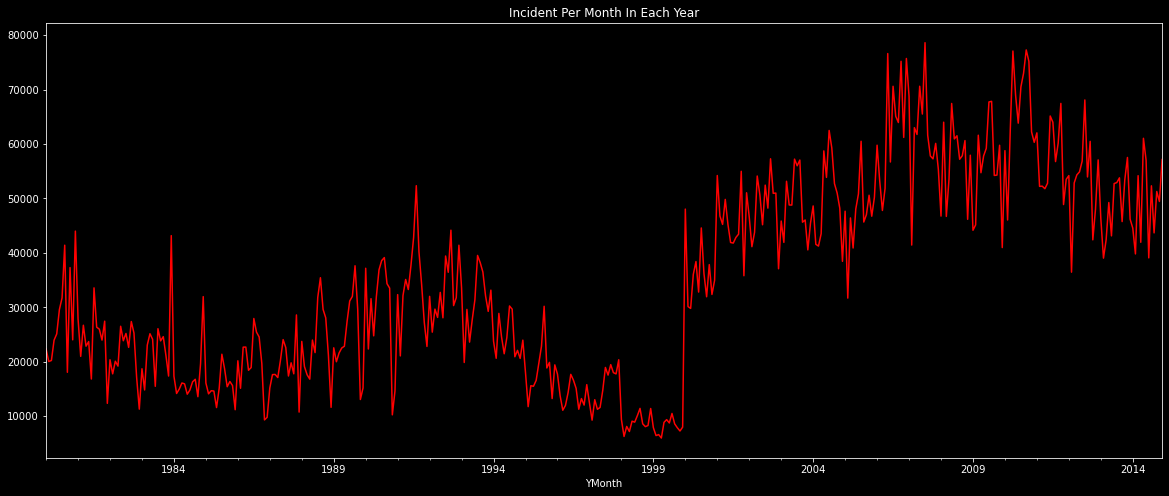

In [83]:
plt.figure(figsize=(20,8))
monthly_incident.plot(c='r')
plt.title('Incident Per Month In Each Year')
plt.show()

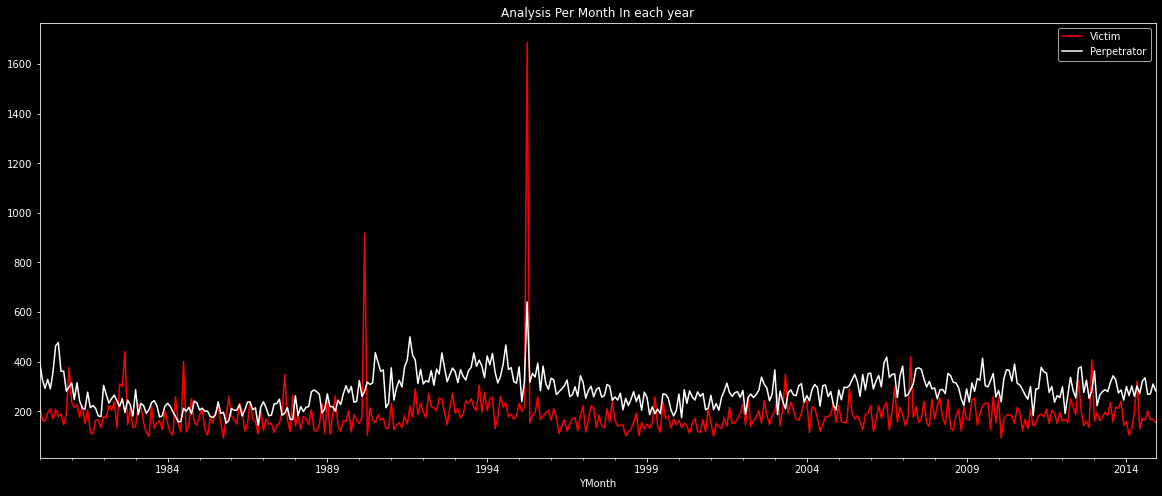

In [87]:
plt.figure(figsize=(20,8))
monthly_victim.plot(label = 'Victim', c= 'r')
monthly_perpetrator.plot(label= 'Perpetrator', c = 'w')
plt.legend(loc='best')
plt.title('Analysis Per Month In each year')
plt.show()

### there are huge spike in 1995 and quite high spike in 1990.. lets see what happened in that two month..

In [95]:
monthly_victim[120:]

YMonth
1990-01    150
1990-02    176
1990-03    918
1990-04    104
1990-05    214
          ... 
2014-08    164
2014-09    202
2014-10    166
2014-11    168
2014-12    154
Freq: M, Name: Victim Count, Length: 300, dtype: int64

### So, It is in March 1990 and count is 918 in one single month.

In [96]:
monthly_victim[180:]

YMonth
1995-01     232
1995-02     200
1995-03     220
1995-04    1686
1995-05     152
           ... 
2014-08     164
2014-09     202
2014-10     166
2014-11     168
2014-12     154
Freq: M, Name: Victim Count, Length: 240, dtype: int64

### And it is Aprill 1995, incident count 1686 

### Lets Gather some Information on net and newspapers to find the reason..